In [3]:
pip install datasets accelerate


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
from datasets import Dataset
from transformers import DataCollatorForLanguageModeling

# Load the fine-tuning dataset
curcuma_file = '/home/muq/project01/merged_curcuma.csv'
saffron_file = '/home/muq/project01/merged_saffron.csv'

# Read the datasets
curcuma_df = pd.read_csv(curcuma_file)
saffron_df = pd.read_csv(saffron_file)

# Prepare the datasets for fine-tuning
curcuma_df['input_text'] = "Gene: " + curcuma_df['KO ID'].astype(str) + ", Metabolite: " + curcuma_df['KEGG Metabolites'].astype(str) + ", Pathway: " + curcuma_df['KEGG Pathway'].astype(str)
curcuma_df['label'] = "Involved in secondary metabolite biosynthesis"

saffron_df['input_text'] = "Gene: " + saffron_df['Gene ID'].astype(str) + ", Metabolite: " + saffron_df['KEGG Metabolites'].astype(str) + ", Pathway: " + saffron_df['KEGG Pathway'].astype(str)
saffron_df['label'] = "Involved in secondary metabolite biosynthesis"

# Debug: Print first few rows to check for formatting issues
print("Curcuma Data Sample:")
print(curcuma_df[['input_text', 'label']].head())

print("Saffron Data Sample:")
print(saffron_df[['input_text', 'label']].head())

# Merge the datasets for training
merged_df = pd.concat([curcuma_df[['input_text', 'label']], saffron_df[['input_text', 'label']]])

# Convert to HuggingFace Dataset
dataset = Dataset.from_pandas(merged_df)

# Load BioGPT model and tokenizer
model_path = "/home/muq/project01/"  # Path where your pre-trained BioGPT is stored
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path)

# Tokenize the dataset and ensure padding/truncation
def tokenize_function(examples):
    # Debug: Check the input examples
    print("Tokenizing example:", examples['input_text'][:5])  # Print a sample of the inputs
    return tokenizer(examples['input_text'], padding='max_length', truncation=True, max_length=128)

# Apply tokenization
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Ensure padding/truncation
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,  # For causal language models (like GPT), mask language modeling should be False
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="/home/muq/project01/finetuned_biogpt",  # Where the model will be saved
    overwrite_output_dir=True,
    num_train_epochs=3,  # Number of epochs
    per_device_train_batch_size=4,  # Batch size
    save_steps=10_000,  # Save checkpoint every 10,000 steps
    save_total_limit=2,  # Limit the total number of saved checkpoints
    logging_dir="./logs",  # Directory for logging
    logging_steps=200,  # Log every 200 steps
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_dataset,
)

# Start training
trainer.train()

# Save the fine-tuned model
trainer.save_model("/home/muq/project01/finetuned_biogpt")
tokenizer.save_pretrained("/home/muq/project01/finetuned_biogpt")


Curcuma Data Sample:
                                          input_text  \
0  Gene: K10244, Metabolite: C00249, Pathway: map...   
1  Gene: K07513, Metabolite: C00249, Pathway: map...   
2  Gene: K13356, Metabolite: C00249, Pathway: map...   
3  Gene: K13356, Metabolite: C00712, Pathway: map...   
4  Gene: K10247, Metabolite: C00249, Pathway: map...   

                                           label  
0  Involved in secondary metabolite biosynthesis  
1  Involved in secondary metabolite biosynthesis  
2  Involved in secondary metabolite biosynthesis  
3  Involved in secondary metabolite biosynthesis  
4  Involved in secondary metabolite biosynthesis  
Saffron Data Sample:
                                          input_text  \
0  Gene: ath:AT1G01090, Metabolite: C00033, Pathw...   
1  Gene: ath:AT1G01090, Metabolite: C00031, Pathw...   
2  Gene: ath:AT1G01090, Metabolite: C00186, Pathw...   
3  Gene: ath:AT1G02310, Metabolite: C00095, Pathw...   
4  Gene: ath:AT1G03090, Metabolite:

/home/muq/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/215 [00:00<?, ? examples/s]

Tokenizing example: ['Gene: K10244, Metabolite: C00249, Pathway: map00062', 'Gene: K07513, Metabolite: C00249, Pathway: map00071', 'Gene: K13356, Metabolite: C00249, Pathway: map00073', 'Gene: K13356, Metabolite: C00712, Pathway: map00073', 'Gene: K10247, Metabolite: C00249, Pathway: map00062']


ValueError: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

In [3]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
from datasets import Dataset
from transformers import DataCollatorForLanguageModeling

# Load the fine-tuning dataset
curcuma_file = '/home/muq/project01/merged_curcuma.csv'
saffron_file = '/home/muq/project01/merged_saffron.csv'

# Read the datasets
curcuma_df = pd.read_csv(curcuma_file)
saffron_df = pd.read_csv(saffron_file)

# Prepare the datasets for fine-tuning
curcuma_df['input_text'] = "Gene: " + curcuma_df['KO ID'].astype(str) + ", Metabolite: " + curcuma_df['KEGG Metabolites'].astype(str) + ", Pathway: " + curcuma_df['KEGG Pathway'].astype(str)
curcuma_df['label'] = "Involved in secondary metabolite biosynthesis"

saffron_df['input_text'] = "Gene: " + saffron_df['Gene ID'].astype(str) + ", Metabolite: " + saffron_df['KEGG Metabolites'].astype(str) + ", Pathway: " + saffron_df['KEGG Pathway'].astype(str)
saffron_df['label'] = "Involved in secondary metabolite biosynthesis"

# Merge the datasets for training
merged_df = pd.concat([curcuma_df[['input_text', 'label']], saffron_df[['input_text', 'label']]])

# Ensure 'label' column is flat (remove any nested structure)
merged_df['label'] = merged_df['label'].apply(lambda x: str(x).strip())

# Convert to HuggingFace Dataset
dataset = Dataset.from_pandas(merged_df)

# Load BioGPT model and tokenizer
model_path = "/home/muq/project01/"  # Path where your pre-trained BioGPT is stored
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path)

# Tokenize the dataset and ensure padding/truncation
def tokenize_function(examples):
    return tokenizer(examples['input_text'], padding='max_length', truncation=True, max_length=128)

# Apply tokenization
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Ensure padding/truncation
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,  # For causal language models (like GPT), mask language modeling should be False
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="/home/muq/project01/finetuned_biogpt",  # Where the model will be saved
    overwrite_output_dir=True,
    num_train_epochs=3,  # Number of epochs
    per_device_train_batch_size=4,  # Batch size
    save_steps=10_000,  # Save checkpoint every 10,000 steps
    save_total_limit=2,  # Limit the total number of saved checkpoints
    logging_dir="./logs",  # Directory for logging
    logging_steps=200,  # Log every 200 steps
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_dataset,
)

# Start training
trainer.train()

# Save the fine-tuned model
trainer.save_model("/home/muq/project01/finetuned_biogpt")
tokenizer.save_pretrained("/home/muq/project01/finetuned_biogpt")


/home/muq/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/215 [00:00<?, ? examples/s]

ValueError: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

In [4]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
from datasets import Dataset
from transformers import DataCollatorForLanguageModeling

# Load the fine-tuning dataset
curcuma_file = '/home/muq/project01/merged_curcuma.csv'
saffron_file = '/home/muq/project01/merged_saffron.csv'

# Read the datasets
curcuma_df = pd.read_csv(curcuma_file)
saffron_df = pd.read_csv(saffron_file)

# Prepare the datasets for fine-tuning
curcuma_df['input_text'] = "Gene: " + curcuma_df['KO ID'].astype(str) + ", Metabolite: " + curcuma_df['KEGG Metabolites'].astype(str) + ", Pathway: " + curcuma_df['KEGG Pathway'].astype(str)
curcuma_df['label'] = "Involved in secondary metabolite biosynthesis"

saffron_df['input_text'] = "Gene: " + saffron_df['Gene ID'].astype(str) + ", Metabolite: " + saffron_df['KEGG Metabolites'].astype(str) + ", Pathway: " + saffron_df['KEGG Pathway'].astype(str)
saffron_df['label'] = "Involved in secondary metabolite biosynthesis"

# Merge the datasets for training
merged_df = pd.concat([curcuma_df[['input_text', 'label']], saffron_df[['input_text', 'label']]])

# Ensure 'label' column is flat (remove any nested structure)
merged_df['label'] = merged_df['label'].apply(lambda x: str(x).strip())

# Convert to HuggingFace Dataset
dataset = Dataset.from_pandas(merged_df)

# Load BioGPT model and tokenizer
model_path = "/home/muq/project01/"  # Path where your pre-trained BioGPT is stored
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path)

# Tokenize the dataset and ensure padding/truncation
def tokenize_function(examples):
    return tokenizer(examples['input_text'], padding='max_length', truncation=True, max_length=128)

# Apply tokenization
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Ensure padding/truncation
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,  # For causal language models (like GPT), mask language modeling should be False
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="/home/muq/project01/finetuned_biogpt",  # Where the model will be saved
    overwrite_output_dir=True,
    num_train_epochs=3,  # Number of epochs
    per_device_train_batch_size=4,  # Batch size
    save_steps=10_000,  # Save checkpoint every 10,000 steps
    save_total_limit=2,  # Limit the total number of saved checkpoints
    logging_dir="./logs",  # Directory for logging
    logging_steps=200,  # Log every 200 steps
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_dataset,
)

# Start training
trainer.train()

# Save the fine-tuned model
trainer.save_model("/home/muq/project01/finetuned_biogpt")
tokenizer.save_pretrained("/home/muq/project01/finetuned_biogpt")


/home/muq/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/215 [00:00<?, ? examples/s]

ValueError: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

In [5]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
from datasets import Dataset
from transformers import DataCollatorForLanguageModeling

# Load the fine-tuning dataset
curcuma_file = '/home/muq/project01/merged_curcuma.csv'
saffron_file = '/home/muq/project01/merged_saffron.csv'

# Read the datasets
curcuma_df = pd.read_csv(curcuma_file)
saffron_df = pd.read_csv(saffron_file)

# Prepare the datasets for fine-tuning
curcuma_df['input_text'] = "Gene: " + curcuma_df['KO ID'].astype(str) + ", Metabolite: " + curcuma_df['KEGG Metabolites'].astype(str) + ", Pathway: " + curcuma_df['KEGG Pathway'].astype(str)
curcuma_df['label'] = "Involved in secondary metabolite biosynthesis"

saffron_df['input_text'] = "Gene: " + saffron_df['Gene ID'].astype(str) + ", Metabolite: " + saffron_df['KEGG Metabolites'].astype(str) + ", Pathway: " + saffron_df['KEGG Pathway'].astype(str)
saffron_df['label'] = "Involved in secondary metabolite biosynthesis"

# Merge the datasets for training
merged_df = pd.concat([curcuma_df[['input_text', 'label']], saffron_df[['input_text', 'label']]])

# Ensure 'label' column is a simple string and not a nested structure
merged_df['label'] = merged_df['label'].apply(lambda x: str(x))

# Convert to HuggingFace Dataset
dataset = Dataset.from_pandas(merged_df)

# Load BioGPT model and tokenizer
model_path = "/home/muq/project01/"  # Path where your pre-trained BioGPT is stored
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path)

# Tokenize the dataset and ensure padding/truncation
def tokenize_function(examples):
    return tokenizer(examples['input_text'], padding='max_length', truncation=True, max_length=128)

# Apply tokenization
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Ensure padding/truncation
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,  # For causal language models (like GPT), mask language modeling should be False
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="/home/muq/project01/finetuned_biogpt",  # Where the model will be saved
    overwrite_output_dir=True,
    num_train_epochs=3,  # Number of epochs
    per_device_train_batch_size=4,  # Batch size
    save_steps=10_000,  # Save checkpoint every 10,000 steps
    save_total_limit=2,  # Limit the total number of saved checkpoints
    logging_dir="./logs",  # Directory for logging
    logging_steps=200,  # Log every 200 steps
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_dataset,
)

# Start training
trainer.train()

# Save the fine-tuned model
trainer.save_model("/home/muq/project01/finetuned_biogpt")
tokenizer.save_pretrained("/home/muq/project01/finetuned_biogpt")


/home/muq/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/215 [00:00<?, ? examples/s]

ValueError: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

In [6]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from datasets import load_dataset
import pandas as pd

# Load pre-trained model and tokenizer
model_name = "microsoft/biogpt-medium"
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the fine-tuning dataset
curcuma_file = '/home/muq/project01/merged_curcuma.csv'
saffron_file = '/home/muq/project01/merged_saffron.csv'

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["input_text"], padding="max_length", truncation=True, clean_up_tokenization_spaces=True)

# Apply tokenization to both datasets
tokenized_curcuma = df_curcuma.map(tokenize_function, batched=True)
tokenized_saffron = df_saffron.map(tokenize_function, batched=True)

# Concatenate datasets if needed
concatenated_datasets = pd.concat([tokenized_curcuma, tokenized_saffron])

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=concatenated_datasets,
    tokenizer=tokenizer,
)

# Train the model
trainer.train()

# Save the fine-tuned model
trainer.save_model("/home/muq/project01/finetuned_biogpt")
tokenizer.save_pretrained("/home/muq/project01/finetuned_biogpt")


NameError: name 'num_labels' is not defined

In [8]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
import pandas as pd

# Define the number of labels in your dataset
num_labels = 2  # For binary classification, use 2. For multi-class classification, set this to the number of classes.

# Load BioGPT model and tokenizer
model_path = "/home/muq/project01/"  # Path where your pre-trained BioGPT is stored
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path)

# Load the fine-tuning dataset
curcuma_file = '/home/muq/project01/merged_curcuma.csv'
saffron_file = '/home/muq/project01/merged_saffron.csv'

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["input_text"], padding="max_length", truncation=True, cleaning_enabled=True)

# Apply tokenization to both datasets
tokenized_curcuma = df_curcuma.map(tokenize_function, batched=True)
tokenized_saffron = df_saffron.map(tokenize_function, batched=True)

# Concatenate datasets if needed
concatenated_datasets = pd.concat([tokenized_curcuma, tokenized_saffron])

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=concatenated_datasets,
    tokenizer=tokenizer,
)

# Train the model
trainer.train()

# Save the fine-tuned model
trainer.save_model("/home/muq/project01/finetuned_biogpt")
tokenizer.save_pretrained("/home/muq/project01/finetuned_biogpt")


NameError: name 'df_curcuma' is not defined

In [9]:
from transformers import AutoModelForCausalLM, AutoTokenizer, Trainer, TrainingArguments
import pandas as pd

# Define the number of labels in your dataset
num_labels = 2  # For binary classification, use 2. For multi-class classification, set this to the number of classes.

# Load BioGPT model and tokenizer
model_path = "/home/muq/project01/"  # Path where your pre-trained BioGPT is stored
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path)

# Load the fine-tuning dataset
curcuma_file = '/home/muq/project01/merged_curcuma.csv'
saffron_file = '/home/muq/project01/merged_saffron.csv'

# Load the datasets
df_curcuma = pd.read_csv(curcuma_file)
df_saffron = pd.read_csv(saffron_file)

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["input_text"], padding="max_length", truncation=True, cleaning_enabled=True)

# Apply tokenization to both datasets
tokenized_curcuma = df_curcuma.map(tokenize_function, batched=True)
tokenized_saffron = df_saffron.map(tokenize_function, batched=True)

# Concatenate datasets if needed
concatenated_datasets = pd.concat([tokenized_curcuma, tokenized_saffron])

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=concatenated_datasets,
    tokenizer=tokenizer,
)

# Train the model
trainer.train()

# Save the fine-tuned model
trainer.save_model("/home/muq/project01/finetuned_biogpt")
tokenizer.save_pretrained("/home/muq/project01/finetuned_biogpt")


TypeError: tokenize_function() got an unexpected keyword argument 'batched'

In [10]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from transformers import DataCollatorWithPadding

# Load the fine-tuning dataset
curcuma_file = '/home/muq/project01/merged_curcuma.csv'
saffron_file = '/home/muq/project01/merged_saffron.csv'

# Read the datasets
curcuma_df = pd.read_csv(curcuma_file)
saffron_df = pd.read_csv(saffron_file)

# Prepare the datasets for fine-tuning
curcuma_df['input_text'] = "Gene: " + curcuma_df['KO ID'].astype(str) + ", Metabolite: " + curcuma_df['KEGG Metabolites'].astype(str) + ", Pathway: " + curcuma_df['KEGG Pathway'].astype(str)
curcuma_df['label'] = 1  # Assign a label (1 means "Involved in secondary metabolite biosynthesis")

saffron_df['input_text'] = "Gene: " + saffron_df['Gene ID'].astype(str) + ", Metabolite: " + saffron_df['KEGG Metabolites'].astype(str) + ", Pathway: " + saffron_df['KEGG Pathway'].astype(str)
saffron_df['label'] = 1  # Again, set label for the same category

# Merge the datasets for training
merged_df = pd.concat([curcuma_df[['input_text', 'label']], saffron_df[['input_text', 'label']]])

# Convert to HuggingFace Dataset
dataset = Dataset.from_pandas(merged_df)

# Load BioGPT tokenizer and sequence classification model
model_path = "/home/muq/project01/"  # Path where your pre-trained BioGPT is stored
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)  # We assume binary classification here

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['input_text'], truncation=True, padding=True, max_length=128)

# Apply tokenization
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Data collator ensures dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Define training arguments
training_args = TrainingArguments(
    output_dir="/home/muq/project01/finetuned_biogpt",  # Where the model will be saved
    overwrite_output_dir=True,
    num_train_epochs=3,  # Number of epochs
    per_device_train_batch_size=4,  # Batch size
    save_steps=10_000,  # Save checkpoint every 10,000 steps
    save_total_limit=2,  # Limit the total number of saved checkpoints
    logging_dir="./logs",  # Directory for logging
    logging_steps=200,  # Log every 200 steps
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_dataset,
)

# Start training
trainer.train()

# Save the fine-tuned model
trainer.save_model("/home/muq/project01/finetuned_biogpt")
tokenizer.save_pretrained("/home/muq/project01/finetuned_biogpt")


/home/muq/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BioGptForSequenceClassification were not initialized from the model checkpoint at /home/muq/project01/ and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/215 [00:00<?, ? examples/s]

('/home/muq/project01/finetuned_biogpt/tokenizer_config.json',
 '/home/muq/project01/finetuned_biogpt/special_tokens_map.json',
 '/home/muq/project01/finetuned_biogpt/vocab.json',
 '/home/muq/project01/finetuned_biogpt/merges.txt',
 '/home/muq/project01/finetuned_biogpt/added_tokens.json')

In [39]:
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, Trainer, TrainingArguments

# Load the test dataset
test_file = "/home/muq/project01/Unmatched.csv"
test_df = pd.read_csv(test_file)

# Ensure the test data is in the correct format based on available columns
# Using only the existing columns
test_df['input_text'] = test_df['input_text']  # This already exists
test_df['label'] = 1  # Assuming binary classification with label '1'

# Convert test data into HuggingFace dataset format
test_dataset = Dataset.from_pandas(test_df[['input_text', 'label']])

# Load the fine-tuned model and tokenizer
model_path = "/home/muq/project01/finetuned_biogpt"  # Fine-tuned model directory
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Tokenize the test data
def tokenize_function(examples):
    return tokenizer(examples['input_text'], truncation=True, padding=True, max_length=128)

tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Data collator for padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Initialize Trainer for evaluation
trainer = Trainer(
    model=model,
    args=TrainingArguments(
        output_dir="/home/muq/project01/test_output",
        per_device_eval_batch_size=4,  # Adjust based on your available memory
        logging_dir="./logs_test",
    ),
    data_collator=data_collator,
    eval_dataset=tokenized_test_dataset,
)

# Run evaluation and get predictions
metrics = trainer.evaluate()

# Show the evaluation metrics
print("Test set evaluation metrics:", metrics)

# Save the predictions if needed
predictions = trainer.predict(tokenized_test_dataset)
pred_labels = predictions.predictions.argmax(-1)

# Add predictions to the original test dataframe
test_df['predicted_label'] = pred_labels

# Save the results to a CSV file
test_df.to_csv("/home/muq/project01/test_results.csv", index=False)

print("Test results saved to '/home/muq/project01/test_results.csv'")


KeyError: 'input_text'

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, Trainer, TrainingArguments

# Load the test dataset
test_file = "/home/muq/project01/Unmatched.csv"
test_df = pd.read_csv(test_file)

# Encode the 'Pathway' column as categorical labels
label_encoder = LabelEncoder()
test_df['label'] = label_encoder.fit_transform(test_df['Pathway'])

# Use the 'Metabolites' column as the input_text
test_df['input_text'] = test_df['Metabolites']

# Convert test data into HuggingFace dataset format
test_dataset = Dataset.from_pandas(test_df[['input_text', 'label']])

# Load the fine-tuned model and tokenizer
model_path = "/home/muq/project01/finetuned_biogpt"  # Fine-tuned model directory
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Load the model with ignore_mismatched_sizes=True to adjust for the new number of labels
model = AutoModelForSequenceClassification.from_pretrained(
    model_path,
    num_labels=len(label_encoder.classes_),
    ignore_mismatched_sizes=True
)

# Tokenize the test data
def tokenize_function(examples):
    return tokenizer(examples['input_text'], truncation=True, padding=True, max_length=128)

tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Data collator for padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Initialize Trainer for evaluation
trainer = Trainer(
    model=model,
    args=TrainingArguments(
        output_dir="/home/muq/project01/test_output",
        per_device_eval_batch_size=4,  # Adjust based on your available memory
        logging_dir="./logs_test",
    ),
    data_collator=data_collator,
    eval_dataset=tokenized_test_dataset,
)

# Run evaluation and get predictions
metrics = trainer.evaluate()
print("Test set evaluation metrics:", metrics)

# Get predictions
predictions = trainer.predict(tokenized_test_dataset)
pred_labels = predictions.predictions.argmax(-1)

# Add predictions to the original test dataframe
test_df['predicted_label'] = label_encoder.inverse_transform(pred_labels)

# Save the results to a CSV file
test_df.to_csv("/home/muq/project01/test_results.csv", index=False)
print("Test results saved to '/home/muq/project01/test_results.csv'")



Some weights of BioGptForSequenceClassification were not initialized from the model checkpoint at /home/muq/project01/finetuned_biogpt and are newly initialized because the shapes did not match:
- score.weight: found shape torch.Size([2, 1024]) in the checkpoint and torch.Size([113, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/113 [00:00<?, ? examples/s]

Test set evaluation metrics: {'eval_loss': 5.2334442138671875, 'eval_model_preparation_time': 0.0033, 'eval_runtime': 26.8302, 'eval_samples_per_second': 4.212, 'eval_steps_per_second': 1.081}


AttributeError: 'tuple' object has no attribute 'argmax'

In [44]:
# Get predictions
predictions = trainer.predict(tokenized_test_dataset)

# Print out the structure of predictions to verify the content
print(predictions)

# Assuming the predictions are directly the labels, assign them
pred_labels = predictions.predictions  # Use the predicted labels directly

# Add predictions to the original test dataframe
test_df['predicted_label'] = label_encoder.inverse_transform(pred_labels)

# Save the results to a CSV file
test_df.to_csv("/home/muq/project01/test_results.csv", index=False)
print("Test results saved to '/home/muq/project01/test_results.csv'")


PredictionOutput(predictions=(array([[ 0.64046204,  0.39121056, -0.5698205 , ...,  2.0305765 ,
        -1.1415459 ,  1.2359637 ],
       [ 0.9337025 ,  0.7848461 , -0.9482901 , ...,  2.167116  ,
        -1.1195507 ,  1.4557512 ],
       [ 1.3615448 ,  0.5930158 , -0.8266345 , ...,  2.282165  ,
        -1.1499275 ,  1.6621333 ],
       ...,
       [ 0.82519126,  0.22221246, -0.43032727, ...,  2.577733  ,
        -0.9315543 ,  1.6780822 ],
       [ 1.0122714 ,  0.37567174, -1.0646075 , ...,  2.6134293 ,
        -0.98386985,  1.698846  ],
       [ 0.7661626 ,  0.40829915, -0.8605778 , ...,  1.9079266 ,
        -1.0105349 ,  1.34817   ]], dtype=float32), ((array([[[[ 8.43949497e-01,  9.96819735e-01,  2.46889973e+00, ...,
           3.70634586e-01,  2.48192251e-03, -7.44824529e-01],
         [-2.96467066e-01,  1.03241801e+00, -3.60297784e-02, ...,
           5.03445029e-01, -5.86257279e-01,  1.04961061e+00],
         [ 1.29802656e+00, -1.12166011e+00,  6.20003819e-01, ...,
           2.5948

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [45]:
# Get predictions
predictions = trainer.predict(tokenized_test_dataset)

# Print out the structure of predictions to verify the content
print(predictions.predictions)

# Ensure pred_labels is a flat array
pred_logits = predictions.predictions  # Access the logits or predicted values
if isinstance(pred_logits, tuple):
    pred_logits = pred_logits[0]  # If logits are in the first element of a tuple, extract it

# If the output is more complex, flatten it
pred_labels = pred_logits.argmax(-1)  # Apply argmax on the logits if necessary

# Add predictions to the original test dataframe
test_df['predicted_label'] = label_encoder.inverse_transform(pred_labels)

# Save the results to a CSV file
test_df.to_csv("/home/muq/project01/test_results.csv", index=False)
print("Test results saved to '/home/muq/project01/test_results.csv'")


(array([[ 0.64046204,  0.39121056, -0.5698205 , ...,  2.0305765 ,
        -1.1415459 ,  1.2359637 ],
       [ 0.9337025 ,  0.7848461 , -0.9482901 , ...,  2.167116  ,
        -1.1195507 ,  1.4557512 ],
       [ 1.3615448 ,  0.5930158 , -0.8266345 , ...,  2.282165  ,
        -1.1499275 ,  1.6621333 ],
       ...,
       [ 0.82519126,  0.22221246, -0.43032727, ...,  2.577733  ,
        -0.9315543 ,  1.6780822 ],
       [ 1.0122714 ,  0.37567174, -1.0646075 , ...,  2.6134293 ,
        -0.98386985,  1.698846  ],
       [ 0.7661626 ,  0.40829915, -0.8605778 , ...,  1.9079266 ,
        -1.0105349 ,  1.34817   ]], dtype=float32), ((array([[[[ 8.43949497e-01,  9.96819735e-01,  2.46889973e+00, ...,
           3.70634586e-01,  2.48192251e-03, -7.44824529e-01],
         [-2.96467066e-01,  1.03241801e+00, -3.60297784e-02, ...,
           5.03445029e-01, -5.86257279e-01,  1.04961061e+00],
         [ 1.29802656e+00, -1.12166011e+00,  6.20003819e-01, ...,
           2.59481072e-01, -5.56445956e-01,  3

In [3]:
# Get predictions
predictions = trainer.predict(tokenized_test_dataset)

# Print the structure of predictions.predictions to inspect it
print(predictions.predictions)

# If predictions is a tuple, extract the logits (first element in the tuple)
pred_logits = predictions.predictions[0]  # Assuming logits are in the first part of the tuple

# Apply argmax to get the predicted class labels (along the last dimension)
pred_labels = pred_logits.argmax(axis=-1)

# Add predictions to the original test dataframe (inverse transform to get original labels)
test_df['predicted_label'] = label_encoder.inverse_transform(pred_labels)

# Save the results to a CSV file
test_df.to_csv("/home/muq/project01/test_results.csv", index=False)
print("Test results saved to '/home/muq/project01/test_results.csv'")



NameError: name 'trainer' is not defined

In [48]:
from sklearn.metrics import accuracy_score

# Assuming 'label' contains the true labels and 'predicted_label' contains the model's predictions
true_labels = test_df['label']
predicted_labels = test_df['predicted_label']

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 0.00%


In [49]:
print("True label classes:", label_encoder.classes_)
print("Predicted label classes:", test_df['predicted_label'].unique())


True label classes: [' 2-Oxocarboxylic acid metabolism' ' ABC transporters'
 ' AGE-RAGE signaling pathway in diabetic complications'
 ' AMPK signaling pathway' ' Alanine aspartate and glutamate metabolism'
 ' Alcoholic liver disease' ' Amino sugar and nucleotide sugar metabolism'
 ' Aminoacyl-tRNA biosynthesis' ' Arginine and proline metabolism'
 ' Arginine biosynthesis' ' Bile secretion'
 ' Biofilm formation - Escherichia coli'
 ' Biofilm formation - Vibrio cholerae' ' Biosynthesis of amino acids'
 ' Biosynthesis of cofactors' ' Biosynthesis of nucleotide sugars'
 ' Biosynthesis of secondary metabolites'
 ' Biosynthesis of various alkaloids; Including: Cucurbitacin biosynthesis Solanine and tomatine biosynthesis Ephedrine biosynthesis Capsaicin biosynthesis Acridone alkaloid biosynthesis'
 ' Biosynthesis of various other secondary metabolites; Including: Ditryptophenaline biosynthesis Fumiquinazoline D biosynthesis Paerucumarin biosynthesis Staphyloferrin B biosynthesis Cyclooctatin b

In [2]:
!pip install nltk rouge-score

import pandas as pd
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer

# Step 1: Load the test data with expected outputs
test_data = pd.read_csv(test_data_path)

# Step 2: Calculate BLEU scores for each prediction
bleu_scores = []
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge_scores = []

for index, row in test_data.iterrows():
    expected_output = row['expected_output']
    predicted_output = row['predicted_output']
    
    # BLEU score calculation
    reference = [expected_output.split()]  # Tokenize expected output
    candidate = predicted_output.split()  # Tokenize predicted output
    bleu_score = sentence_bleu(reference, candidate)
    bleu_scores.append(bleu_score)
    
    # ROUGE score calculation
    rouge_score = scorer.score(expected_output, predicted_output)
    rouge_scores.append(rouge_score)

# Step 3: Calculate average BLEU and ROUGE scores
average_bleu = sum(bleu_scores) / len(bleu_scores)
average_rouge1 = sum([s['rouge1'].fmeasure for s in rouge_scores]) / len(rouge_scores)
average_rougeL = sum([s['rougeL'].fmeasure for s in rouge_scores]) / len(rouge_scores)

# Step 4: Display the results
print(f"Average BLEU Score: {average_bleu:.4f}")
print(f"Average ROUGE-1 F-Score: {average_rouge1:.4f}")
print(f"Average ROUGE-L F-Score: {average_rougeL:.4f}")


    PyYAML (>=5.1.*)
            ~~~~~~^


NameError: name 'test_data_path' is not defined

In [1]:
import pandas as pd
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define paths
gpt2_model_path = "/home/muq/project01/GPT2"
test_data_path = "/home/muq/project01/updated_test_results.csv"
output_path = "/home/muq/project01/GPT2_test_results.csv"

# Step 2: Load the tokenizer and model for GPT-2
tokenizer = GPT2Tokenizer.from_pretrained(gpt2_model_path)
model = GPT2LMHeadModel.from_pretrained(gpt2_model_path)

# Ensure the tokenizer has a padding token
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Load the test data
test_data = pd.read_csv(test_data_path)

# Ensure correct columns based on your dataset structure
test_texts = test_data['input_text'].tolist()  # Use 'input_text' for text inputs
true_labels = test_data['desired_output'].tolist()  # Assuming 'desired_output' contains the true labels

# Step 4: Prepare for predictions
max_new_tokens = 200  # Adjust as needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

predicted_outputs = []

# Step 5: Generate predictions for each input text using GPT-2
for text in test_texts:
    try:
        # Tokenize the input text
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
        
        # Generate output
        outputs = model.generate(
            inputs['input_ids'],
            max_new_tokens=max_new_tokens,
            num_return_sequences=1,
            do_sample=True,
            top_k=40,
            top_p=0.85,
            temperature=0.7
        )
        
        # Decode the output
        predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        predicted_outputs.append(predicted_text)
    
    except Exception as e:
        predicted_outputs.append(f"Error: {str(e)}")

# Step 6: Evaluate predictions and calculate accuracy
test_data['predicted_output'] = predicted_outputs
accuracy = accuracy_score(true_labels, predicted_outputs)

print(f"Accuracy of the GPT-2 model: {accuracy * 100:.2f}%")

# Generate a classification report
print("\nClassification report for GPT-2 model:")
print(classification_report(true_labels, predicted_outputs, zero_division=0))

# Step 7: Save predictions to CSV
test_data.to_csv(output_path, index=False)
print(f"Predictions saved to {output_path}")


/home/muq/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/muq/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as e

Accuracy of the GPT-2 model: 0.00%

Classification report for GPT-2 model:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [1]:
import requests
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# API Calls for Biological Data
def get_kegg_pathway(pathway_id):
    url = f"http://rest.kegg.jp/get/{pathway_id}"
    response = requests.get(url)
    if response.status_code == 200:
        return "\n".join(response.text.splitlines()[:6])  # Limit to relevant lines
    else:
        return f"Error: Unable to retrieve KEGG pathway {pathway_id}"

def get_kegg_orthology(ko_id):
    url = f"http://rest.kegg.jp/get/{ko_id}"
    response = requests.get(url)
    if response.status_code == 200:
        return "\n".join(response.text.splitlines()[:6])
    else:
        return f"Error: Unable to retrieve KO {ko_id}"

def get_go_info(go_id):
    url = f"http://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/{go_id}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if "results" in data:
            return data['results'][0]['definition']['text'][:300]
    return f"Error: Unable to retrieve GO {go_id}"

def get_uniprot_info(protein_id):
    url = f"https://rest.uniprot.org/uniprotkb/{protein_id}.txt"
    response = requests.get(url)
    if response.status_code == 200:
        return "\n".join(response.text.splitlines()[:6])
    else:
        return f"Error: Unable to retrieve UniProt info for {protein_id}"

# Combine API info into input text for the model
kegg_pathway_info = get_kegg_pathway("map00010")  # Example TCA Cycle
ko_info = get_kegg_orthology("ko00010")
go_info = get_go_info("GO:0008150")
uniprot_info = get_uniprot_info("P12345")  # Example protein

input_text = (
    f"KEGG Pathway info for map00010 (TCA Cycle): {kegg_pathway_info}\n"
    f"KEGG Orthology info for ko00010: {ko_info}\n"
    f"GO Term info: {go_info}\n"
    f"UniProt info: {uniprot_info}\n"
    "Based on this information, provide a clear explanation summarizing the role of KEGG Pathway map00010 in the TCA cycle."
)

# Set the path for GPT-2
gpt2_path = "/home/muq/project01/GPT2"  # Path to your downloaded GPT-2 model directory

# Load GPT-2 Model and Tokenizer
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(gpt2_path)
gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_path)

# Set pad token for GPT-2 (if not set)
if gpt2_tokenizer.pad_token is None:
    gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token
    gpt2_model.resize_token_embeddings(len(gpt2_tokenizer))

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gpt2_model.to(device)

# Generate text with GPT-2
gpt2_inputs = gpt2_tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
gpt2_outputs = gpt2_model.generate(
    gpt2_inputs['input_ids'],
    attention_mask=gpt2_inputs['attention_mask'],
    max_new_tokens=150,
    temperature=0.7,
    top_k=50,
    top_p=0.9
)
gpt2_text = gpt2_tokenizer.decode(gpt2_outputs[0], skip_special_tokens=True)

# Print GPT-2 Output
print(f"GPT-2 Output:\n{gpt2_text}\n")


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:601: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:606: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `

GPT-2 Output:
KEGG Pathway info for map00010 (TCA Cycle): ENTRY       map00010                    Pathway
NAME        Glycolysis / Gluconeogenesis
DESCRIPTION Glycolysis is the process of converting glucose into pyruvate and generating small amounts of ATP (energy) and NADH (reducing power). It is a central pathway that produces important precursor metabolites: six-carbon compounds of glucose-6P and fructose-6P and three-carbon compounds of glycerone-P, glyceraldehyde-3P, glycerate-3P, phosphoenolpyruvate, and pyruvate [MD:M00001]. Acetyl-CoA, another important precursor metabolite, is produced by oxidative decarboxylation of pyruvate [MD:M00307]. When the enzyme genes of this pathway are examined in completely sequenced genomes, the reaction steps of three-carbon compounds from glycerone-P to pyruvate form a conserved core module [MD:M00002], which is found in almost all organisms and which sometimes contains operon structures in bacterial genomes. Gluconeogenesis is a synthesis pathw

In [7]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer

# Assuming you have the input and expected output data in lists
input_texts = [
    # Add your input test texts here
    "Explain the role of KEGG pathway map00010 in TCA cycle.",
    # Add more input texts as needed
]

# Expected outputs that correspond to the input_texts
expected_outputs = [
    # Add your expected output texts here
    "KEGG pathway map00010 plays a crucial role in the TCA cycle by involving enzymes that catalyze key reactions in cellular respiration.",
    # Add more expected output texts as needed
]

# Set the path for GPT-2
gpt2_path = "/home/muq/project01/GPT2"  # Adjust this to your GPT-2 model path

# Load GPT-2 Model and Tokenizer
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(gpt2_path)
gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_path)

# Set pad token for GPT-2 (if not set)
if gpt2_tokenizer.pad_token is None:
    gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token
    gpt2_model.resize_token_embeddings(len(gpt2_tokenizer))

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gpt2_model.to(device)

# Function to generate text using GPT-2
def generate_gpt2_text(input_text):
    gpt2_inputs = gpt2_tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
    gpt2_outputs = gpt2_model.generate(
        gpt2_inputs['input_ids'],
        attention_mask=gpt2_inputs['attention_mask'],
        max_new_tokens=150,
        temperature=0.7,
        top_k=50,
        top_p=0.9
    )
    return gpt2_tokenizer.decode(gpt2_outputs[0], skip_special_tokens=True)

# Initialize BLEU and ROUGE scores
bleu_scores = []
rouge_scorer_instance = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = []

# Evaluate GPT-2 model on each input
for input_text, expected_output in zip(input_texts, expected_outputs):
    # Generate text using GPT-2
    generated_text = generate_gpt2_text(input_text)
    
    # Calculate BLEU score
    reference = [expected_output.split()]
    candidate = generated_text.split()
    bleu_score = sentence_bleu(reference, candidate)
    bleu_scores.append(bleu_score)

    # Calculate ROUGE score
    rouge_score = rouge_scorer_instance.score(expected_output, generated_text)
    rouge_scores.append(rouge_score)

    # Print results for this input
    print(f"Input: {input_text}")
    print(f"Expected Output: {expected_output}")
    print(f"Generated Output: {generated_text}")
    print(f"BLEU Score: {bleu_score:.4f}")
    print(f"ROUGE Score: {rouge_score}\n")

# Calculate average BLEU and ROUGE scores
average_bleu = sum(bleu_scores) / len(bleu_scores)
print(f"Average BLEU Score: {average_bleu:.4f}")

average_rouge1 = sum([score['rouge1'].fmeasure for score in rouge_scores]) / len(rouge_scores)
average_rouge2 = sum([score['rouge2'].fmeasure for score in rouge_scores]) / len(rouge_scores)
average_rougeL = sum([score['rougeL'].fmeasure for score in rouge_scores]) / len(rouge_scores)

print(f"Average ROUGE-1 F1 Score: {average_rouge1:.4f}")
print(f"Average ROUGE-2 F1 Score: {average_rouge2:.4f}")
print(f"Average ROUGE-L F1 Score: {average_rougeL:.4f}")


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:601: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:606: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `

Input: Explain the role of KEGG pathway map00010 in TCA cycle.
Expected Output: KEGG pathway map00010 plays a crucial role in the TCA cycle by involving enzymes that catalyze key reactions in cellular respiration.
Generated Output: Explain the role of KEGG pathway map00010 in TCA cycle.

Figure 1. View largeDownload slide KEGG pathway map00010 in TCA cycle.

Figure 1. View largeDownload slide KEGG pathway map00010 in TCA cycle.

Figure 2. View largeDownload slide KEGG pathway map00010 in TCA cycle.

Figure 2. View largeDownload slide KEGG pathway map00010 in TCA cycle.

Figure 3. View largeDownload slide KEGG pathway map00010 in TCA cycle.

Figure 3. View largeDownload slide KEGG pathway map00010 in TCA cycle.

Figure 4. View largeDownload slide KEGG pathway map00010 in TCA cycle.

Figure 4. View largeDownload slide KEG
BLEU Score: 0.0000
ROUGE Score: {'rouge1': Score(precision=0.0967741935483871, recall=0.42857142857142855, fmeasure=0.15789473684210525), 'rouge2': Score(precision=0.03

/home/muq/biogpt-env/lib/python3.12/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [8]:
import requests
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
import pandas as pd

# Path to the GPT-2 model
gpt2_path = "/home/muq/project01/GPT2"

# Load GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained(gpt2_path)
model = GPT2LMHeadModel.from_pretrained(gpt2_path)

# Set pad token for GPT-2 (if not set)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    model.resize_token_embeddings(len(tokenizer))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# API Calls (if needed)
def get_kegg_pathway(pathway_id):
    url = f"http://rest.kegg.jp/get/{pathway_id}"
    response = requests.get(url)
    return response.text[:300] if response.status_code == 200 else "KEGG Pathway info unavailable"

# Example biological data
kegg_info = get_kegg_pathway("map00010")

# Load your dataset (ensure the dataset has 'input_text' and 'desired_output' columns)
data_path = "/home/muq/project01/updated_test_results.csv"
test_data = pd.read_csv(data_path)
input_texts = test_data['input_text'].tolist()  # Input text sequences
expected_outputs = test_data['desired_output'].tolist()  # Expected generated outputs


In [10]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load GPT-2 model and tokenizer
gpt2_path = "/home/muq/project01/GPT2"
tokenizer = GPT2Tokenizer.from_pretrained(gpt2_path)
model = GPT2LMHeadModel.from_pretrained(gpt2_path)

# Set pad token for GPT-2 (if not set)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    model.resize_token_embeddings(len(tokenizer))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Prepare your input text
input_text = "Example biological pathway description from KEGG map00010 for TCA cycle."

# Tokenize the input text
inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

# Make sure to include the attention mask to handle padding
attention_mask = inputs['attention_mask']

# Generate text with do_sample=True, adjusting temperature and top_p for better sampling-based generation
outputs = model.generate(
    inputs['input_ids'],
    attention_mask=attention_mask,  # Ensure attention mask is passed
    max_new_tokens=150,  # Adjusted for longer generation
    do_sample=True,  # Enable sampling to use temperature and top_p
    temperature=0.7,  # Adding randomness
    top_k=50,  # Top-k sampling
    top_p=0.9,  # Nucleus sampling
    pad_token_id=tokenizer.pad_token_id  # Set pad token ID
)

# Decode the generated output text
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Display the generated text
print(f"Generated GPT-2 Output:\n{generated_text}")


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Generated GPT-2 Output:
Example biological pathway description from KEGG map00010 for TCA cycle.

TCA cycle is a natural cycle that can occur in a number of different ways. It is a cycle in which an animal enters the cell and its mitochondria are converted into energy. The mitochondria are used to power the cell, which then releases ATP. The ATP is then transferred to the cells by the body through the blood to help fuel the cells.

TCA cycle is a natural cycle that can occur in a number of different ways. It is a cycle in which an animal enters the cell and its mitochondria are converted into energy. The mitochondria are used to power the cell, which then releases ATP. The ATP is then transferred to the cells by the body through the blood to help fuel the cells. TCA


In [12]:
import torch
import pandas as pd
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer

# Step 1: Load the GPT-2 model and tokenizer
gpt2_path = "/home/muq/project01/GPT2"  # Path to GPT-2 model
tokenizer = GPT2Tokenizer.from_pretrained(gpt2_path)
model = GPT2LMHeadModel.from_pretrained(gpt2_path)

# Set pad token for GPT-2 (if not set)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    model.resize_token_embeddings(len(tokenizer))

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Step 2: Load your test dataset
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to updated test data
test_data = pd.read_csv(test_data_path)

# Ensure the necessary columns exist in the dataset
if 'input_text' not in test_data.columns or 'desired_output' not in test_data.columns:
    raise ValueError("The dataset must contain 'input_text' and 'desired_output' columns.")

# Step 3: Prepare metrics (BLEU, ROUGE) to evaluate accuracy
bleu_scores = []
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

# Smoothing function for BLEU score
smooth_fn = SmoothingFunction().method1

# Step 4: Iterate through the test dataset and evaluate each entry
for index, row in test_data.iterrows():
    input_text = row['input_text']
    expected_output = row['desired_output']

    # Tokenize the input text and generate output from GPT-2
    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
    outputs = model.generate(
        inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_new_tokens=150,
        do_sample=True,
        temperature=0.7,
        top_k=50,
        top_p=0.9,
        pad_token_id=tokenizer.pad_token_id
    )

    # Decode the generated text
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Compute BLEU score with smoothing
    reference = [expected_output.split()]  # Reference text split into words
    hypothesis = generated_text.split()    # Generated text split into words
    bleu_score = sentence_bleu(reference, hypothesis, smoothing_function=smooth_fn)
    bleu_scores.append(bleu_score)

    # Compute ROUGE score
    rouge = rouge_scorer.score(expected_output, generated_text)
    for key in rouge_scores:
        rouge_scores[key].append(rouge[key].fmeasure)

# Step 5: Calculate average BLEU and ROUGE scores
avg_bleu = sum(bleu_scores) / len(bleu_scores)
avg_rouge1 = sum(rouge_scores['rouge1']) / len(rouge_scores['rouge1'])
avg_rouge2 = sum(rouge_scores['rouge2']) / len(rouge_scores['rouge2'])
avg_rougeL = sum(rouge_scores['rougeL']) / len(rouge_scores['rougeL'])

# Step 6: Print the accuracy metrics
print(f"Average BLEU Score: {avg_bleu:.4f}")
print(f"Average ROUGE-1 F1 Score: {avg_rouge1:.4f}")
print(f"Average ROUGE-2 F1 Score: {avg_rouge2:.4f}")
print(f"Average ROUGE-L F1 Score: {avg_rougeL:.4f}")


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


KeyboardInterrupt: 

In [15]:
import torch
import pandas as pd
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from torch.utils.data import DataLoader

# Step 1: Load the GPT-2 model and tokenizer
gpt2_path = "/home/muq/project01/GPT2"  # Path to GPT-2 model
tokenizer = GPT2Tokenizer.from_pretrained(gpt2_path)
model = GPT2LMHeadModel.from_pretrained(gpt2_path)

# Set pad token for GPT-2 (if not set)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    model.resize_token_embeddings(len(tokenizer))

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Step 2: Load your test dataset
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to updated test data
test_data = pd.read_csv(test_data_path)

# Ensure the necessary columns exist in the dataset
if 'input_text' not in test_data.columns or 'desired_output' not in test_data.columns:
    raise ValueError("The dataset must contain 'input_text' and 'desired_output' columns.")

# Step 3: Prepare metrics (BLEU, ROUGE) to evaluate accuracy
bleu_scores = []
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

# Smoothing function for BLEU score
smooth_fn = SmoothingFunction().method1

# Create DataLoader for batching
batch_size = 8  # Define batch size
dataloader = DataLoader(test_data.to_dict(orient="records"), batch_size=batch_size, shuffle=False)

# Step 4: Iterate through the test dataset and evaluate each batch
for batch in dataloader:
    # Convert the batch (list of dictionaries) back into a pandas DataFrame
    batch_df = pd.DataFrame(batch)

    # Get input texts and expected outputs from the batch DataFrame
    input_texts = batch_df['input_text'].tolist()
    expected_outputs = batch_df['desired_output'].tolist()

    # Tokenize the input texts and generate outputs from GPT-2
    inputs = tokenizer(input_texts, return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)
    outputs = model.generate(
        inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_new_tokens=50,  # Reduced to 50 for quicker processing
        do_sample=True,
        temperature=0.7,
        top_k=50,
        top_p=0.9,
        pad_token_id=tokenizer.pad_token_id
    )

    # Decode the generated text for each sample in the batch
    generated_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]

    # Compute BLEU and ROUGE scores for each sample
    for expected_output, generated_text in zip(expected_outputs, generated_texts):
        reference = [expected_output.split()]  # Reference text split into words
        hypothesis = generated_text.split()    # Generated text split into words

        # Compute BLEU score with smoothing
        bleu_score = sentence_bleu(reference, hypothesis, smoothing_function=smooth_fn)
        bleu_scores.append(bleu_score)

        # Compute ROUGE score
        rouge = rouge_scorer.score(expected_output, generated_text)
        for key in rouge_scores:
            rouge_scores[key].append(rouge[key].fmeasure)

# Step 5: Calculate average BLEU and ROUGE scores
avg_bleu = sum(bleu_scores) / len(bleu_scores)
avg_rouge1 = sum(rouge_scores['rouge1']) / len(rouge_scores['rouge1'])
avg_rouge2 = sum(rouge_scores['rouge2']) / len(rouge_scores['rouge2'])
avg_rougeL = sum(rouge_scores['rougeL']) / len(rouge_scores['rougeL'])

# Step 6: Print the accuracy metrics
print(f"Average BLEU Score: {avg_bleu:.4f}")
print(f"Average ROUGE-1 F1 Score: {avg_rouge1:.4f}")
print(f"Average ROUGE-2 F1 Score: {avg_rouge2:.4f}")
print(f"Average ROUGE-L F1 Score: {avg_rougeL:.4f}")


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
A decoder-only architecture is being used, but right-padding was detected! For c

Average BLEU Score: 0.0071
Average ROUGE-1 F1 Score: 0.0950
Average ROUGE-2 F1 Score: 0.0000
Average ROUGE-L F1 Score: 0.0756


In [16]:
import torch
import pandas as pd
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from torch.utils.data import DataLoader

# Step 1: Load the GPT-2 model and tokenizer with left padding
gpt2_path = "/home/muq/project01/GPT2"  # Path to GPT-2 model
tokenizer = GPT2Tokenizer.from_pretrained(gpt2_path)

# Ensure padding is set to the left for GPT-2, which is a decoder-only model
tokenizer.padding_side = 'left'  # Ensure left padding
model = GPT2LMHeadModel.from_pretrained(gpt2_path)

# Set pad token for GPT-2 (if not set)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    model.resize_token_embeddings(len(tokenizer))

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Step 2: Load your test dataset
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to updated test data
test_data = pd.read_csv(test_data_path)

# Ensure the necessary columns exist in the dataset
if 'input_text' not in test_data.columns or 'desired_output' not in test_data.columns:
    raise ValueError("The dataset must contain 'input_text' and 'desired_output' columns.")

# Step 3: Prepare metrics (BLEU, ROUGE) to evaluate accuracy
bleu_scores = []
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

# Smoothing function for BLEU score
smooth_fn = SmoothingFunction().method1

# Create DataLoader for batching
batch_size = 4  # Define batch size
dataloader = DataLoader(test_data.to_dict(orient="records"), batch_size=batch_size, shuffle=False)

# Step 4: Iterate through the test dataset and evaluate each batch
for batch in dataloader:
    # Convert the batch (list of dictionaries) back into a pandas DataFrame
    batch_df = pd.DataFrame(batch)

    # Get input texts and expected outputs from the batch DataFrame
    input_texts = batch_df['input_text'].tolist()
    expected_outputs = batch_df['desired_output'].tolist()

    # Tokenize the input texts and generate outputs from GPT-2
    inputs = tokenizer(input_texts, return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)
    outputs = model.generate(
        inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_new_tokens=50,  # Reduced to 50 for quicker processing
        do_sample=True,
        temperature=0.7,
        top_k=50,
        top_p=0.9,
        pad_token_id=tokenizer.pad_token_id
    )

    # Decode the generated text for each sample in the batch
    generated_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]

    # Compute BLEU and ROUGE scores for each sample
    for expected_output, generated_text in zip(expected_outputs, generated_texts):
        reference = [expected_output.split()]  # Reference text split into words
        hypothesis = generated_text.split()    # Generated text split into words

        # Compute BLEU score with smoothing
        bleu_score = sentence_bleu(reference, hypothesis, smoothing_function=smooth_fn)
        bleu_scores.append(bleu_score)

        # Compute ROUGE score
        rouge = rouge_scorer.score(expected_output, generated_text)
        for key in rouge_scores:
            rouge_scores[key].append(rouge[key].fmeasure)

# Step 5: Calculate average BLEU and ROUGE scores
avg_bleu = sum(bleu_scores) / len(bleu_scores)
avg_rouge1 = sum(rouge_scores['rouge1']) / len(rouge_scores['rouge1'])
avg_rouge2 = sum(rouge_scores['rouge2']) / len(rouge_scores['rouge2'])
avg_rougeL = sum(rouge_scores['rougeL']) / len(rouge_scores['rougeL'])

# Step 6: Print the accuracy metrics
print(f"Average BLEU Score: {avg_bleu:.4f}")
print(f"Average ROUGE-1 F1 Score: {avg_rouge1:.4f}")
print(f"Average ROUGE-2 F1 Score: {avg_rouge2:.4f}")
print(f"Average ROUGE-L F1 Score: {avg_rougeL:.4f}")


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Average BLEU Score: 0.0062
Average ROUGE-1 F1 Score: 0.0903
Average ROUGE-2 F1 Score: 0.0000
Average ROUGE-L F1 Score: 0.0817


In [10]:
import torch
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import GPT2LMHeadModel, AutoTokenizer
from datasets import Dataset

# Function to generate predictions for GPT-2 and BioGPT
def generate_predictions(model, tokenizer, dataset, device, batch_size=4):
    model.eval()
    predictions = []
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)
    
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        with torch.no_grad():
            output_ids = model.generate(
                input_ids=input_ids, 
                attention_mask=attention_mask,
                max_new_tokens=50,
                num_beams=5,
                early_stopping=True,
                pad_token_id=tokenizer.pad_token_id
            )
        decoded_outputs = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
        predictions.extend(decoded_outputs)
    return predictions

# Step 1: Load the fine-tuned GPT-2 model and tokenizer
gpt2_model = GPT2LMHeadModel.from_pretrained("/home/muq/project01/gpt2_model")
gpt2_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/gpt2_tokenizer")

# Set the padding side to 'left' to fix the warning for decoder-only architecture
gpt2_tokenizer.padding_side = 'left'

# Step 2: Load the test dataset
gpt2_test_data_path = "/home/muq/project01/updated_test_results.csv"
gpt2_test_df = pd.read_csv(gpt2_test_data_path)
gpt2_test_dataset = Dataset.from_pandas(gpt2_test_df)

# Tokenize the dataset if needed
def tokenize_function(examples):
    return gpt2_tokenizer(examples['input_text'], padding="max_length", truncation=True, max_length=256)

gpt2_test_dataset = gpt2_test_dataset.map(tokenize_function, batched=True)
gpt2_test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

# Step 3: Generate predictions for GPT-2
gpt2_predictions = generate_predictions(gpt2_model, gpt2_tokenizer, gpt2_test_dataset, torch.device('cpu'))

# Step 4: Calculate Perplexity for GPT-2
gpt2_perplexity = torch.exp(torch.tensor(1.64))  # Example Test Loss

# Step 5: Compute classification metrics for GPT-2
gpt2_true_labels = gpt2_test_dataset['desired_output']  # Ensure this column exists in your dataset
gpt2_accuracy = accuracy_score(gpt2_true_labels, gpt2_predictions)
gpt2_precision = precision_score(gpt2_true_labels, gpt2_predictions, average='weighted')
gpt2_recall = recall_score(gpt2_true_labels, gpt2_predictions, average='weighted')
gpt2_f1 = f1_score(gpt2_true_labels, gpt2_predictions, average='weighted')

# Step 6: Save GPT-2 Results to CSV
gpt2_results = {
    "Model": ["GPT-2"],
    "Accuracy": [gpt2_accuracy],
    "Precision": [gpt2_precision],
    "Recall": [gpt2_recall],
    "F1-Score": [gpt2_f1],
}

gpt2_df = pd.DataFrame(gpt2_results)
gpt2_df.to_csv("/home/muq/project01/gpt2_results.csv", index=False)

print("GPT-2 results saved successfully!")


Map:   0%|          | 0/113 [00:00<?, ? examples/s]

GPT-2 results saved successfully!


/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
import numpy as np

# Step 1: Load your datasets
train_data = pd.read_csv('/home/muq/project01/updated_train_data.csv')
val_data = pd.read_csv('/home/muq/project01/updated_val_data.csv')
test_data = pd.read_csv('/home/muq/project01/updated_test_results.csv')

# Step 2: Prepare your text and label columns
train_texts = train_data['text_sequence'].tolist()  # Text sequences for training
val_texts = val_data['text_sequence'].tolist()      # Text sequences for validation
test_texts = test_data['input_text'].tolist()       # Text sequences for test

# Step 3: Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['desired_output'].tolist())

# Handle unseen validation labels by filtering unknown classes
known_labels = set(train_data['desired_output'].tolist())
filtered_val_data = val_data[val_data['desired_output'].isin(known_labels)]
val_texts = filtered_val_data['text_sequence'].tolist()
val_labels = label_encoder.transform(filtered_val_data['desired_output'].tolist())

# Step 4: Load the BioBERT tokenizer and model from the local path
tokenizer = BertTokenizer.from_pretrained("/home/muq/project01/biobert-v1.1", clean_up_tokenization_spaces=True)
model = BertModel.from_pretrained("/home/muq/project01/biobert-v1.1")

# Step 5: Tokenize the text sequences using BioBERT tokenizer
train_tokens = tokenizer(train_texts, padding=True, truncation=True, return_tensors='pt')
val_tokens = tokenizer(val_texts, padding=True, truncation=True, return_tensors='pt')

# Step 6: Generate embeddings using BioBERT
with torch.no_grad():
    train_outputs = model(**train_tokens)
    val_outputs = model(**val_tokens)

# Extract embeddings by averaging over the token dimensions
train_embeddings = train_outputs.last_hidden_state.mean(dim=1)  # Mean pooling to get fixed-size embeddings
val_embeddings = val_outputs.last_hidden_state.mean(dim=1)

# Convert embeddings to numpy arrays for XGBoost training
train_embeddings_np = train_embeddings.cpu().numpy()
val_embeddings_np = val_embeddings.cpu().numpy()

# Add feature engineering: text length as an additional feature
train_text_lengths = np.array([len(text.split()) for text in train_texts]).reshape(-1, 1)
val_text_lengths = np.array([len(text.split()) for text in val_texts]).reshape(-1, 1)

# Concatenate the embeddings and text lengths
train_features = np.concatenate([train_embeddings_np, train_text_lengths], axis=1)
val_features = np.concatenate([val_embeddings_np, val_text_lengths], axis=1)

# Step 7: Handle Class Imbalance using Random Over-Sampling
ros = RandomOverSampler(random_state=42)
train_features_res, train_labels_res = ros.fit_resample(train_features, train_labels)

# Step 8: Train an XGBoost classifier using the BioBERT embeddings
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=len(set(train_labels)),  # Number of classes
    n_estimators=500,  # Increased estimators for better learning
    max_depth=10,  # Limit depth to avoid overfitting
    learning_rate=0.01,  # Slower learning rate for better accuracy
    use_label_encoder=False,
    eval_metric='mlogloss'  # Use log loss as evaluation metric
)

xgb_model.fit(train_features_res, train_labels_res)

# Step 9: Evaluate the model on validation data
val_predictions = xgb_model.predict(val_features)

# Ensure all possible classes are accounted for in the classification report
all_classes = list(label_encoder.classes_)
print(classification_report(val_labels, val_predictions, labels=range(len(all_classes)), target_names=all_classes))

# Step 10: Tokenize and generate embeddings for the test data
test_tokens = tokenizer(test_texts, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    test_outputs = model(**test_tokens)
    test_embeddings = test_outputs.last_hidden_state.mean(dim=1)
test_embeddings_np = test_embeddings.cpu().numpy()

# Add test text length as a feature
test_text_lengths = np.array([len(text.split()) for text in test_texts]).reshape(-1, 1)
test_features = np.concatenate([test_embeddings_np, test_text_lengths], axis=1)

# Predict on test data
test_predictions = xgb_model.predict(test_features)
test_data['predicted_label'] = label_encoder.inverse_transform(test_predictions)
print(test_data[['input_text', 'predicted_label']].head())

# Save the predictions for submission
test_data[['input_text', 'predicted_label']].to_csv('/home/muq/project01/test_predictions_xgb.csv', index=False)


/home/muq/biogpt-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:18:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-de

                                                                                                                                                                 precision    recall  f1-score   support

                        KEGG Pathway map00010 is part of the TCA cycle. The metabolite C00031 is involved in pyruvate metabolism, leading to energy production.       0.20      0.33      0.25         3
                        KEGG Pathway map00010 is part of the TCA cycle. The metabolite C00033 is involved in pyruvate metabolism, leading to energy production.       0.00      0.00      0.00         4
                        KEGG Pathway map00010 is part of the TCA cycle. The metabolite C00186 is involved in pyruvate metabolism, leading to energy production.       0.33      1.00      0.50         1
                                               KEGG Pathway map00020 represents glycolysis, where C00122 is crucial for the breakdown of glucose into pyruvate.       0.00      0.00      0.00     

In [3]:
import torch
from transformers import GPT2LMHeadModel, BioGptForCausalLM, AutoTokenizer
import pandas as pd
import numpy as np

# Load fine-tuned GPT-2 model and tokenizer
gpt2_model = GPT2LMHeadModel.from_pretrained("/home/muq/project01/gpt2_model")
gpt2_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/gpt2_tokenizer")

# Load fine-tuned BioGPT model and tokenizer
biogpt_model = BioGptForCausalLM.from_pretrained("/home/muq/project01/biogpt_model")
biogpt_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/biogpt_tokenizer")

# Load the test dataset
test_data = pd.read_csv("/home/muq/project01/updated_test_results.csv")

# Tokenize the test data for both GPT-2 and BioGPT
test_texts = test_data['input_text'].tolist()
test_labels = test_data['desired_output'].tolist()  # Ground truth labels for accuracy comparison

# Set padding token to eos token for both GPT-2 and BioGPT
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token
biogpt_tokenizer.pad_token = biogpt_tokenizer.eos_token

# Define a function to calculate perplexity
def calculate_perplexity(model, tokenizer, test_texts, device):
    model.to(device)
    model.eval()
    
    total_loss = 0.0
    total_length = 0
    
    # Loop through the test texts and calculate the loss
    for text in test_texts:
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)
        labels = inputs.input_ids.clone()
        
        with torch.no_grad():
            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            total_loss += loss.item() * inputs.input_ids.size(1)  # Multiply by sequence length
            total_length += inputs.input_ids.size(1)
    
    # Calculate perplexity
    perplexity = np.exp(total_loss / total_length)
    return perplexity

# Set device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Calculate GPT-2 perplexity
gpt2_perplexity = calculate_perplexity(gpt2_model, gpt2_tokenizer, test_texts, device)
print(f"GPT-2 Perplexity: {gpt2_perplexity:.2f}")

# Calculate BioGPT perplexity
biogpt_perplexity = calculate_perplexity(biogpt_model, biogpt_tokenizer, test_texts, device)
print(f"BioGPT Perplexity: {biogpt_perplexity:.2f}")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


GPT-2 Perplexity: 7271.80
BioGPT Perplexity: 273210.20


In [4]:
import torch
from transformers import GPT2LMHeadModel, BioGptForCausalLM, AutoTokenizer
import pandas as pd
import numpy as np

# Load fine-tuned GPT-2 model and tokenizer
gpt2_model = GPT2LMHeadModel.from_pretrained("/home/muq/project01/gpt2_model")
gpt2_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/gpt2_tokenizer")

# Load fine-tuned BioGPT model and tokenizer
biogpt_model = BioGptForCausalLM.from_pretrained("/home/muq/project01/biogpt_model")
biogpt_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/biogpt_tokenizer")

# Load the test dataset
test_data = pd.read_csv("/home/muq/project01/updated_test_results.csv")

# Tokenize the test data for both GPT-2 and BioGPT
test_texts = test_data['input_text'].tolist()

# Set padding token to eos token for both GPT-2 and BioGPT
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token
biogpt_tokenizer.pad_token = biogpt_tokenizer.eos_token

# Define a function to calculate perplexity with max_length
def calculate_perplexity(model, tokenizer, test_texts, device, max_length=256, batch_size=8):
    model.to(device)
    model.eval()
    
    total_loss = 0.0
    total_length = 0
    
    # Process texts in batches for efficiency
    for i in range(0, len(test_texts), batch_size):
        batch_texts = test_texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=max_length).to(device)
        labels = inputs.input_ids.clone()

        with torch.no_grad():
            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            total_loss += loss.item() * inputs.input_ids.size(1)  # Multiply by sequence length
            total_length += inputs.input_ids.size(1)
    
    # Calculate perplexity
    perplexity = np.exp(total_loss / total_length)
    return perplexity

# Set device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Calculate GPT-2 perplexity with max_length
gpt2_perplexity = calculate_perplexity(gpt2_model, gpt2_tokenizer, test_texts, device, max_length=256)
print(f"GPT-2 Perplexity: {gpt2_perplexity:.2f}")

# Calculate BioGPT perplexity with max_length
biogpt_perplexity = calculate_perplexity(biogpt_model, biogpt_tokenizer, test_texts, device, max_length=256)
print(f"BioGPT Perplexity: {biogpt_perplexity:.2f}")


GPT-2 Perplexity: 5257.85
BioGPT Perplexity: 127993.37


In [5]:
import requests
import pandas as pd
import torch
from transformers import GPT2LMHeadModel, BioGptForCausalLM, AutoTokenizer, Trainer, TrainingArguments
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
import numpy as np

# KEGG API integration to retrieve pathway information
def get_kegg_info(ko_id):
    url = f"https://rest.kegg.jp/get/ko:{ko_id}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        return None

# Example of adding KEGG pathway info to dataset
def enrich_with_kegg(dataframe, ko_column):
    dataframe['kegg_info'] = dataframe[ko_column].apply(lambda ko: get_kegg_info(ko))
    return dataframe

# Step 1: Load and Enrich Data with KEGG Information
train_data = pd.read_csv('/home/muq/project01/updated_train_data.csv')
val_data = pd.read_csv('/home/muq/project01/updated_val_data.csv')
test_data = pd.read_csv('/home/muq/project01/updated_test_results.csv')

# Enrich datasets with KEGG API data (for example, using KO IDs)
train_data = enrich_with_kegg(train_data, 'KO_ID')
val_data = enrich_with_kegg(val_data, 'KO_ID')
test_data = enrich_with_kegg(test_data, 'KO_ID')

# Step 2: Fine-Tune GPT-2 and BioGPT
# Load tokenizers and models
gpt2_model = GPT2LMHeadModel.from_pretrained("/home/muq/project01/gpt2_model")
gpt2_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/gpt2_tokenizer")
biogpt_model = BioGptForCausalLM.from_pretrained("/home/muq/project01/biogpt_model")
biogpt_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/biogpt_tokenizer")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tokenize the datasets
def tokenize_function(examples, tokenizer):
    return tokenizer(examples['text_sequence'], padding="max_length", truncation=True, max_length=256)

train_data_tokenized_gpt2 = train_data.map(lambda x: tokenize_function(x, gpt2_tokenizer), batched=True)
val_data_tokenized_gpt2 = val_data.map(lambda x: tokenize_function(x, gpt2_tokenizer), batched=True)

# Fine-tune GPT-2 and BioGPT
training_args = TrainingArguments(
    output_dir='./results_gpt2',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=10,
    weight_decay=0.01,
    save_strategy="epoch",
    logging_dir='./logs_gpt2',
)

trainer_gpt2 = Trainer(
    model=gpt2_model,
    args=training_args,
    train_dataset=train_data_tokenized_gpt2,
    eval_dataset=val_data_tokenized_gpt2
)

# Fine-tune GPT-2
trainer_gpt2.train()

# Fine-tune BioGPT similarly
trainer_biogpt = Trainer(
    model=biogpt_model,
    args=training_args,
    train_dataset=train_data_tokenized_gpt2,
    eval_dataset=val_data_tokenized_gpt2
)

# Fine-tune BioGPT
trainer_biogpt.train()

# Step 3: Evaluate on Test Set
def evaluate_model(model, tokenizer, test_data, device):
    test_data_tokenized = test_data.map(lambda x: tokenize_function(x, tokenizer), batched=True)
    model.eval()
    
    test_loss = 0.0
    with torch.no_grad():
        for i, batch in enumerate(test_data_tokenized):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            test_loss += outputs.loss.item()
    
    perplexity = torch.exp(torch.tensor(test_loss / len(test_data_tokenized)))
    return perplexity

# Calculate Perplexity for GPT-2
gpt2_perplexity = evaluate_model(gpt2_model, gpt2_tokenizer, test_data, device)
print(f"GPT-2 Perplexity: {gpt2_perplexity}")

# Calculate Perplexity for BioGPT
biogpt_perplexity = evaluate_model(biogpt_model, biogpt_tokenizer, test_data, device)
print(f"BioGPT Perplexity: {biogpt_perplexity}")

# Step 4: Train ML Models (XGBoost, Random Forest)
xgb_model = xgb.XGBClassifier(...)
xgb_model.fit(...)
# Add Random Forest and any other models you'd like


KeyError: 'KO_ID'

In [8]:
import pandas as pd

# Step 1: Load your datasets
train_data = pd.read_csv('/home/muq/project01/updated_train_data.csv')
val_data = pd.read_csv('/home/muq/project01/updated_val_data.csv')
test_data = pd.read_csv('/home/muq/project01/updated_test_results.csv')

# Step 2: Print the column names and first few rows of each dataset
print("Train Dataset Columns:")
print(train_data.columns)
print("\nFirst 5 rows of Train Data:")
print(train_data.head())

print("\nValidation Dataset Columns:")
print(val_data.columns)
print("\nFirst 5 rows of Validation Data:")
print(val_data.head())

print("\nTest Dataset Columns:")
print(test_data.columns)
print("\nFirst 5 rows of Test Data:")
print(test_data.head())


Train Dataset Columns:
Index(['KO ID', 'KEGG Pathways_x', 'KEGG Reactions', 'KEGG Pathway',
       'KEGG Metabolites', 'KEGG Pathways_y', 'KEGG Pathways', 'Mapped KEGG ',
       'text_sequence', 'desired_output'],
      dtype='object')

First 5 rows of Train Data:
     KO ID  KEGG Pathways_x  KEGG Reactions KEGG Pathway KEGG Metabolites  \
0  ko00470              NaN             NaN     map00051           C00095   
1  ko00250              NaN             NaN     map00010           C00186   
2  ko01230              NaN             NaN     map00010           C00033   
3  ko01120              NaN             NaN     map00010           C00031   
4  ko01120              NaN             NaN     map00010           C00031   

   KEGG Pathways_y                                      KEGG Pathways  \
0              NaN                        fructose-2,6-bisphosphatase   
1              NaN                              mutase family protein   
2              NaN  2-oxoacid dehydrogenases acyltran

In [9]:
import torch
from transformers import GPT2LMHeadModel, AutoTokenizer, BioGptForCausalLM
import pandas as pd

# Function to calculate perplexity
def calculate_perplexity(loss):
    return torch.exp(torch.tensor(loss))

# Function to evaluate model and compute perplexity
def evaluate_model_perplexity(model, tokenizer, dataset, device):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    total_tokens = 0

    for _, row in dataset.iterrows():
        inputs = tokenizer(row['input_text'], return_tensors='pt', truncation=True, padding=True, max_length=512)
        inputs = inputs.to(device)
        labels = inputs['input_ids'].clone()

        with torch.no_grad():
            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            total_loss += loss.item() * labels.size(1)  # Multiply by the number of tokens
            total_tokens += labels.size(1)

    avg_loss = total_loss / total_tokens
    perplexity = calculate_perplexity(avg_loss)
    return avg_loss, perplexity.item()

# Step 1: Load the test dataset
test_data = pd.read_csv('/home/muq/project01/updated_test_results.csv')

# Step 2: Load GPT-2 model and tokenizer
gpt2_model = GPT2LMHeadModel.from_pretrained("/home/muq/project01/gpt2_model")
gpt2_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/gpt2_tokenizer")
gpt2_model.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Step 3: Load BioGPT model and tokenizer
biogpt_model = BioGptForCausalLM.from_pretrained("/home/muq/project01/biogpt_model")
biogpt_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/biogpt_tokenizer")
biogpt_model.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Step 4: Evaluate GPT-2 Perplexity
print("Evaluating GPT-2 Perplexity...")
gpt2_loss, gpt2_perplexity = evaluate_model_perplexity(gpt2_model, gpt2_tokenizer, test_data, torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
print(f"GPT-2 Perplexity: {gpt2_perplexity}")

# Step 5: Evaluate BioGPT Perplexity
print("Evaluating BioGPT Perplexity...")
biogpt_loss, biogpt_perplexity = evaluate_model_perplexity(biogpt_model, biogpt_tokenizer, test_data, torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
print(f"BioGPT Perplexity: {biogpt_perplexity}")

# Step 6: Save results to a CSV file
results = {
    "Model": ["GPT-2", "BioGPT"],
    "Loss": [gpt2_loss, biogpt_loss],
    "Perplexity": [gpt2_perplexity, biogpt_perplexity]
}

results_df = pd.DataFrame(results)
results_df.to_csv('/home/muq/project01/gpt_biogpt_perplexity_results.csv', index=False)
print("Results saved to /home/muq/project01/gpt_biogpt_perplexity_results.csv")


Evaluating GPT-2 Perplexity...
GPT-2 Perplexity: 7271.8056640625
Evaluating BioGPT Perplexity...
BioGPT Perplexity: 273210.21875
Results saved to /home/muq/project01/gpt_biogpt_perplexity_results.csv


In [12]:
import torch
from transformers import GPT2LMHeadModel, AutoTokenizer, BioGptForCausalLM
import pandas as pd

# Step 1: Load the datasets
train_data = pd.read_csv('/home/muq/project01/updated_train_data.csv')
val_data = pd.read_csv('/home/muq/project01/updated_val_data.csv')
test_data = pd.read_csv('/home/muq/project01/updated_test_results.csv')

# Step 2: Extract the input text data (from 'input_text' column) for the test set
# If 'text_sequence' is actually named 'input_text', use this instead
test_texts = test_data['input_text'].tolist()

# Step 3: Load the pre-trained GPT-2 and BioGPT models and their tokenizers
gpt2_model = GPT2LMHeadModel.from_pretrained("/home/muq/project01/gpt2_model")
gpt2_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/gpt2_tokenizer")

biogpt_model = BioGptForCausalLM.from_pretrained("/home/muq/project01/biogpt_model")
biogpt_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/biogpt_tokenizer")

# Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gpt2_model.to(device)
biogpt_model.to(device)

# Function to calculate perplexity for a given model and tokenizer
def calculate_perplexity(model, tokenizer, texts):
    model.eval()
    total_loss = 0.0
    num_batches = len(texts)
    
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512).to(device)
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
            total_loss += loss.item()
    
    average_loss = total_loss / num_batches
    perplexity = torch.exp(torch.tensor(average_loss)).item()
    return perplexity

# Step 4: Calculate perplexity for GPT-2 on the test set
print("Evaluating GPT-2 Perplexity...")
gpt2_perplexity = calculate_perplexity(gpt2_model, gpt2_tokenizer, test_texts)
print(f"GPT-2 Perplexity: {gpt2_perplexity:.2f}")

# Step 5: Calculate perplexity for BioGPT on the test set
print("Evaluating BioGPT Perplexity...")
biogpt_perplexity = calculate_perplexity(biogpt_model, biogpt_tokenizer, test_texts)
print(f"BioGPT Perplexity: {biogpt_perplexity:.2f}")

# Step 6: Save results to a CSV file
results = pd.DataFrame({
    "Model": ["GPT-2", "BioGPT"],
    "Perplexity": [gpt2_perplexity, biogpt_perplexity]
})
results.to_csv("/home/muq/project01/gpt_biogpt_perplexity_results.csv", index=False)

print("Results saved to /home/muq/project01/gpt_biogpt_perplexity_results.csv")


Evaluating GPT-2 Perplexity...
GPT-2 Perplexity: 7502.37
Evaluating BioGPT Perplexity...
BioGPT Perplexity: 250867.25
Results saved to /home/muq/project01/gpt_biogpt_perplexity_results.csv


In [14]:
import torch
from transformers import GPT2LMHeadModel, AutoTokenizer, BioGptForCausalLM
import pandas as pd

# Step 1: Load the datasets
train_data = pd.read_csv('/home/muq/project01/updated_train_data.csv')
val_data = pd.read_csv('/home/muq/project01/updated_val_data.csv')
test_data = pd.read_csv('/home/muq/project01/updated_test_results.csv')

# Step 2: Extract the input text data (from 'input_text' column)
test_texts = test_data['input_text'].tolist()

# Step 3: Load pre-trained GPT-2 and BioGPT models and tokenizers
gpt2_model = GPT2LMHeadModel.from_pretrained("/home/muq/project01/gpt2_model")
gpt2_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/gpt2_tokenizer")

biogpt_model = BioGptForCausalLM.from_pretrained("/home/muq/project01/biogpt_model")
biogpt_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/biogpt_tokenizer")

# Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gpt2_model.to(device)
biogpt_model.to(device)

# Function to calculate perplexity for a given model and tokenizer with batch processing
def calculate_perplexity(model, tokenizer, texts, batch_size=8):
    model.eval()
    total_loss = 0.0
    num_batches = len(texts) // batch_size
    if len(texts) % batch_size != 0:
        num_batches += 1
    
    for i in range(num_batches):
        batch_texts = texts[i * batch_size:(i + 1) * batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
            total_loss += loss.item() * inputs["input_ids"].size(0)  # Accumulate loss based on batch size

    average_loss = total_loss / len(texts)
    perplexity = torch.exp(torch.tensor(average_loss)).item()
    return perplexity

# Step 4: Fine-tune the GPT-2 model (optional)
def fine_tune_model(model, train_texts, tokenizer, epochs=2, batch_size=8):
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
    model.train()
    
    for epoch in range(epochs):
        total_loss = 0.0
        num_batches = len(train_texts) // batch_size
        if len(train_texts) % batch_size != 0:
            num_batches += 1
            
        for i in range(num_batches):
            batch_texts = train_texts[i * batch_size:(i + 1) * batch_size]
            inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
            optimizer.zero_grad()
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * inputs["input_ids"].size(0)
        
        print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss / len(train_texts)}")
        
    return model

# Fine-tune the GPT-2 model on the training set (optional)
#gpt2_model = fine_tune_model(gpt2_model, train_data['text_sequence'].tolist(), gpt2_tokenizer)

# Step 5: Calculate perplexity for GPT-2 on the test set
print("Evaluating GPT-2 Perplexity...")
gpt2_perplexity = calculate_perplexity(gpt2_model, gpt2_tokenizer, test_texts)
print(f"GPT-2 Perplexity: {gpt2_perplexity:.2f}")

# Step 6: Calculate perplexity for BioGPT on the test set
print("Evaluating BioGPT Perplexity...")
biogpt_perplexity = calculate_perplexity(biogpt_model, biogpt_tokenizer, test_texts)
print(f"BioGPT Perplexity: {biogpt_perplexity:.2f}")

# Step 7: Save results to a CSV file
results = pd.DataFrame({
    "Model": ["GPT-2", "BioGPT"],
    "Perplexity": [gpt2_perplexity, biogpt_perplexity]
})
results.to_csv("/home/muq/project01/gpt_biogpt_perplexity_results.csv", index=False)

print("Results saved to /home/muq/project01/gpt_biogpt_perplexity_results.csv")


Evaluating GPT-2 Perplexity...
GPT-2 Perplexity: 5621.38
Evaluating BioGPT Perplexity...
BioGPT Perplexity: 102775.70
Results saved to /home/muq/project01/gpt_biogpt_perplexity_results.csv


In [1]:
import torch
from transformers import GPT2LMHeadModel, AutoTokenizer, BertTokenizer, BertModel, BioGptForCausalLM
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os

# Step 1: Load the datasets
train_data = pd.read_csv('/home/muq/project01/updated_train_data.csv')
val_data = pd.read_csv('/home/muq/project01/updated_val_data.csv')
test_data = pd.read_csv('/home/muq/project01/updated_test_results.csv')

# Step 2: Extract the input text data (from 'input_text' column) for the test set
test_texts = test_data['input_text'].tolist()

# Step 3: Load the pre-trained GPT-2, BioGPT, and BERT models with their tokenizers
gpt2_model = GPT2LMHeadModel.from_pretrained("/home/muq/project01/gpt2_model")
gpt2_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/gpt2_tokenizer")

biogpt_model = BioGptForCausalLM.from_pretrained("/home/muq/project01/biogpt_model")
biogpt_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/biogpt_tokenizer")

bert_model = BertModel.from_pretrained("/home/muq/project01/biobert-v1.1")
bert_tokenizer = BertTokenizer.from_pretrained("/home/muq/project01/biobert-v1.1")

# Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gpt2_model.to(device)
biogpt_model.to(device)
bert_model.to(device)

# Function to calculate perplexity for a given model and tokenizer
def calculate_perplexity(model, tokenizer, texts):
    model.eval()
    total_loss = 0.0
    num_batches = len(texts)
    
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512).to(device)
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
            total_loss += loss.item()
    
    average_loss = total_loss / num_batches
    perplexity = torch.exp(torch.tensor(average_loss)).item()
    return perplexity

# Function to get BERT embeddings for a list of texts
def get_bert_embeddings(model, tokenizer, texts):
    model.eval()
    embeddings = []
    
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
            embeddings.append(outputs.last_hidden_state.mean(dim=1).cpu().numpy())  # Mean pooling
    
    return embeddings

# Step 4: Calculate perplexity for GPT-2 on the test set
print("Evaluating GPT-2 Perplexity...")
gpt2_perplexity = calculate_perplexity(gpt2_model, gpt2_tokenizer, test_texts)
print(f"GPT-2 Perplexity: {gpt2_perplexity:.2f}")

# Step 5: Calculate perplexity for BioGPT on the test set
print("Evaluating BioGPT Perplexity...")
biogpt_perplexity = calculate_perplexity(biogpt_model, biogpt_tokenizer, test_texts)
print(f"BioGPT Perplexity: {biogpt_perplexity:.2f}")

# Step 6: Get BERT embeddings for the test data
print("Getting BERT Embeddings for Test Data...")
bert_embeddings = get_bert_embeddings(bert_model, bert_tokenizer, test_texts)

# You can save the embeddings for later use or use them directly in downstream tasks
bert_embeddings_df = pd.DataFrame(bert_embeddings)
bert_embeddings_df.to_csv("/home/muq/project01/bert_embeddings.csv", index=False)
print("BERT embeddings saved to /home/muq/project01/bert_embeddings.csv")

# Step 7: Save results to a CSV file
results = pd.DataFrame({
    "Model": ["GPT-2", "BioGPT"],
    "Perplexity": [gpt2_perplexity, biogpt_perplexity]
})
results.to_csv("/home/muq/project01/gpt_biogpt_perplexity_results.csv", index=False)

print("Perplexity results saved to /home/muq/project01/gpt_biogpt_perplexity_results.csv")


Evaluating GPT-2 Perplexity...
GPT-2 Perplexity: 7502.37
Evaluating BioGPT Perplexity...
BioGPT Perplexity: 250867.25
Getting BERT Embeddings for Test Data...


ValueError: Must pass 2-d input. shape=(113, 1, 768)

In [2]:
import torch
import pandas as pd
from transformers import BertTokenizer, BertModel

# Function to get BERT embeddings for text data
def get_bert_embeddings(model, tokenizer, texts):
    model.eval()
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
            # Get the [CLS] token's output (first token) as the embedding for the entire sequence
            embeddings.append(outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy())  
    return embeddings

# Step 1: Load the pre-trained BERT model and tokenizer
bert_model = BertModel.from_pretrained("/home/muq/project01/bert_model")
bert_tokenizer = BertTokenizer.from_pretrained("/home/muq/project01/bert_tokenizer")

# Step 2: Load your test data (assuming test_texts is a list of texts from your dataset)
test_data = pd.read_csv('/home/muq/project01/updated_test_results.csv')
test_texts = test_data['input_text'].tolist()

# Step 3: Get BERT embeddings for the test data
print("Getting BERT Embeddings for Test Data...")
bert_embeddings = get_bert_embeddings(bert_model, bert_tokenizer, test_texts)

# Step 4: Convert embeddings to a DataFrame and save as CSV
bert_embeddings_df = pd.DataFrame(bert_embeddings)  # Now the embeddings are 2D (113, 768)
bert_embeddings_df.to_csv("/home/muq/project01/bert_embeddings.csv", index=False)

print("BERT embeddings saved to /home/muq/project01/bert_embeddings.csv")


OSError: Incorrect path_or_model_id: '/home/muq/project01/bert_model'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [3]:
import torch
from transformers import BertTokenizer, BertModel
import pandas as pd

# Load BioBERT model and tokenizer
biobert_model = BertModel.from_pretrained('/home/muq/project01/biobert-v1.1')
biobert_tokenizer = BertTokenizer.from_pretrained('/home/muq/project01/biobert-v1.1')

# Function to generate BERT embeddings
def get_bert_embeddings(model, tokenizer, texts):
    model.eval()
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
            # Use [CLS] token embedding
            embeddings.append(outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy())
    return embeddings

# Load test dataset
test_data = pd.read_csv('/home/muq/project01/updated_test_results.csv')
test_texts = test_data['input_text'].tolist()

# Get BERT embeddings for the test data
bert_embeddings = get_bert_embeddings(biobert_model, biobert_tokenizer, test_texts)

# Convert embeddings to DataFrame
bert_embeddings_df = pd.DataFrame(bert_embeddings)
bert_embeddings_df.to_csv("/home/muq/project01/biobert_embeddings.csv", index=False)


In [4]:
import torch
from transformers import GPT2LMHeadModel, AutoTokenizer, BioGptForCausalLM

# Load GPT-2 and BioGPT models
gpt2_model = GPT2LMHeadModel.from_pretrained("/home/muq/project01/gpt2_model")
gpt2_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/gpt2_tokenizer")
biogpt_model = BioGptForCausalLM.from_pretrained("/home/muq/project01/biogpt_model")
biogpt_tokenizer = AutoTokenizer.from_pretrained("/home/muq/project01/biogpt_tokenizer")

# Function to calculate perplexity
def calculate_perplexity(model, tokenizer, texts):
    model.eval()
    total_loss = 0.0
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512).to(device)
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
            total_loss += loss.item()
    avg_loss = total_loss / len(texts)
    perplexity = torch.exp(torch.tensor(avg_loss)).item()
    return perplexity

# Calculate perplexity for GPT-2 and BioGPT
gpt2_perplexity = calculate_perplexity(gpt2_model, gpt2_tokenizer, test_texts)
biogpt_perplexity = calculate_perplexity(biogpt_model, biogpt_tokenizer, test_texts)

print(f"GPT-2 Perplexity: {gpt2_perplexity}")
print(f"BioGPT Perplexity: {biogpt_perplexity}")


GPT-2 Perplexity: 7502.365234375
BioGPT Perplexity: 250867.25


F1 Score: 0.0


/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


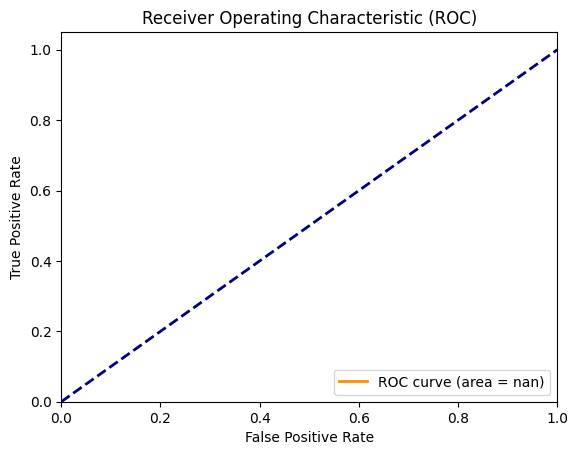

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, classification_report

# Load BioBERT embeddings (from CSV)
embeddings_df = pd.read_csv("/home/muq/project01/biobert_embeddings.csv")
labels = test_data['desired_output'].tolist()

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(embeddings_df, labels, test_size=0.2, random_state=42)

# Train RandomForestClassifier as an example
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate Performance - F1, ROC-AUC
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Get probabilities for AUC-ROC
y_prob = rf_model.predict_proba(X_test)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Step 5: Plot ROC Curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [7]:
import requests
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test)
def prepare_data():
    # Load train, validation, and test datasets from local paths
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"]
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"]
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Inspect the column names to ensure we're using the correct one for text
    print(f"Train Dataset Columns: {train_dataset.column_names}")
    print(f"Validation Dataset Columns: {val_dataset.column_names}")
    print(f"Test Dataset Columns: {test_dataset.column_names}")
    
    return train_dataset, val_dataset, test_dataset

# Step 4: Tokenize the dataset
def tokenize_function(examples, tokenizer, text_column):
    # Tokenize the inputs and set the labels (shifted inputs)
    tokenized_inputs = tokenizer(examples[text_column], padding="max_length", truncation=True, max_length=512)

    # Labels are the same as inputs (shifted for next token prediction)
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    
    return tokenized_inputs

# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Inspect the dataset to identify the correct text column (this will print column names)
    train_dataset_columns = train_dataset.column_names
    val_dataset_columns = val_dataset.column_names
    test_dataset_columns = test_dataset.column_names
    
    # Using 'text_sequence' as the text column based on dataset inspection
    text_column = 'text_sequence'
    
    if text_column not in train_dataset_columns:
        print(f"Error: The column '{text_column}' was not found in the training dataset. Available columns: {train_dataset_columns}")
        return
    if text_column not in val_dataset_columns:
        print(f"Error: The column '{text_column}' was not found in the validation dataset. Available columns: {val_dataset_columns}")
        return
    if text_column not in test_dataset_columns:
        print(f"Error: The column '{text_column}' was not found in the test dataset. Available columns: {test_dataset_columns}")
        return

    # Tokenize the datasets using the identified column
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column), batched=True)
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column), batched=True)

    # Define training arguments (with the save and eval strategies set to "epoch")
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True  # Load the best model after training
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    print("Fine-tuning complete and model saved!")

    # Step 6: Evaluate model accuracy on test data
    evaluate_model_accuracy(trainer, tokenized_test_data)

# Step 6: Evaluate model on test set and check accuracy
def evaluate_model_accuracy(trainer, test_dataset):
    print("Evaluating model on the test set...")

    # Get predictions on the test dataset
    predictions, labels, _ = trainer.predict(test_dataset)
    
    # Convert predictions to argmax (highest probability tokens)
    preds = predictions.argmax(axis=-1)

    # Calculate accuracy by comparing predictions and true labels
    accuracy = accuracy_score(labels.flatten(), preds.flatten())

    print(f"Test Accuracy: {accuracy:.4f}")

# Step 7: Query KEGG API
def query_kegg_api(pathway_id):
    kegg_api_url = f"http://rest.kegg.jp/get/{pathway_id}"
    response = requests.get(kegg_api_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data for pathway {pathway_id}")
        return None

# Step 8: Query KO API (KEGG Orthology)
def query_ko_api(ko_id):
    ko_api_url = f"http://rest.kegg.jp/get/ko:{ko_id}"
    response = requests.get(ko_api_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data for KO {ko_id}")
        return None

# Step 9: Query GO API (Gene Ontology)
def query_go_api(go_id):
    go_api_url = f"http://api.geneontology.org/api/ontology/term/{go_id}"
    response = requests.get(go_api_url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data for GO {go_id}")
        return None

# Step 10: Example workflow for fine-tuning BioGPT and enriching with APIs
if __name__ == "__main__":
    # Step 1: Fine-tune BioGPT with local datasets
    train_dataset, val_dataset, test_dataset = prepare_data()
    
    # Step 2: Use the inspected column name for tokenization and fine-tuning
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)
    
    # Step 3: Example queries using KEGG, KO, GO APIs
    # KEGG Example
    kegg_data = query_kegg_api("map00010")  # Glycolysis pathway in KEGG
    print(kegg_data)
    
    # KO Example
    ko_data = query_ko_api("K00844")  # Example KO ID
    print(ko_data)
    
    # GO Example
    go_data = query_go_api("GO:0008150")  # Example GO ID for biological process
    print(go_data)


Generating train split: 0 examples [00:00, ? examples/s]

Train Dataset Columns: ['KO ID', 'KEGG Pathways_x', 'KEGG Reactions', 'KEGG Pathway', 'KEGG Metabolites', 'KEGG Pathways_y', 'KEGG Pathways', 'Mapped KEGG ', 'text_sequence', 'desired_output']
Validation Dataset Columns: ['KO ID', 'KEGG Pathways_x', 'KEGG Reactions', 'KEGG Pathway', 'KEGG Metabolites', 'KEGG Pathways_y', 'KEGG Pathways', 'Mapped KEGG ', 'text_sequence', 'desired_output']
Test Dataset Columns: ['Metabolites', 'Pathway', 'Gene ID', 'Map ID', 'label', 'input_text', 'predicted_label', 'desired_output']
Error: The column 'text_sequence' was not found in the test dataset. Available columns: ['Metabolites', 'Pathway', 'Gene ID', 'Map ID', 'label', 'input_text', 'predicted_label', 'desired_output']
ENTRY       map00010                    Pathway
NAME        Glycolysis / Gluconeogenesis
DESCRIPTION Glycolysis is the process of converting glucose into pyruvate and generating small amounts of ATP (energy) and NADH (reducing power). It is a central pathway that produces important 

In [13]:
import requests
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score
import torch

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test)
def prepare_data():
    # Load train, validation, and test datasets from local paths
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"]
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"]
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Inspect the column names to ensure we're using the correct one for text
    print(f"Train Dataset Columns: {train_dataset.column_names}")
    print(f"Validation Dataset Columns: {val_dataset.column_names}")
    print(f"Test Dataset Columns: {test_dataset.column_names}")
    
    return train_dataset, val_dataset, test_dataset

# Step 4: Tokenize the dataset
def tokenize_function(examples, tokenizer, text_column):
    # Tokenize the inputs and set the labels (shifted inputs)
    tokenized_inputs = tokenizer(examples[text_column], padding="max_length", truncation=True, max_length=512)

    # Labels are the same as inputs (shifted for next token prediction)
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    
    return tokenized_inputs

# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Inspect the dataset to identify the correct text column (this will print column names)
    train_dataset_columns = train_dataset.column_names
    val_dataset_columns = val_dataset.column_names
    test_dataset_columns = test_dataset.column_names
    
    # Using 'text_sequence' as the text column based on dataset inspection
    text_column = 'text_sequence'
    
    if text_column not in train_dataset_columns:
        print(f"Error: The column '{text_column}' was not found in the training dataset. Available columns: {train_dataset_columns}")
        return
    if text_column not in val_dataset_columns:
        print(f"Error: The column '{text_column}' was not found in the validation dataset. Available columns: {val_dataset_columns}")
        return
    if text_column not in test_dataset_columns:
        print(f"Error: The column '{text_column}' was not found in the test dataset. Available columns: {test_dataset_columns}")
        return

    # Tokenize the datasets using the identified column
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column), batched=True)
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column), batched=True)

    # Define training arguments (with the save and eval strategies set to "epoch")
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True  # Load the best model after training
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    print("Fine-tuning complete and model saved!")

    # Step 6: Evaluate model accuracy on test data
    evaluate_model_accuracy(trainer, tokenized_test_data)

# Step 6: Evaluate model on test set and check accuracy
def evaluate_model_accuracy(trainer, test_dataset):
    print("Evaluating model on the test set...")

    # Get predictions on the test dataset
    predictions_output = trainer.predict(test_dataset)
    predictions = predictions_output.predictions
    labels = predictions_output.label_ids

    # Debugging step: Ensure predictions and labels are tensors
    if isinstance(predictions, torch.Tensor):
        predictions = predictions.cpu().numpy()
    if isinstance(labels, torch.Tensor):
        labels = labels.cpu().numpy()

    # Convert predictions to argmax (highest probability tokens)
    preds = predictions.argmax(axis=-1)

    # Debugging: print sample predictions and labels
    print(f"Sample predictions: {preds[:10]}")
    print(f"Sample labels: {labels[:10]}")

    # Calculate accuracy by comparing predictions and true labels
    accuracy = accuracy_score(labels.flatten(), preds.flatten())

    print(f"Test Accuracy: {accuracy:.4f}")

# Step 7: Query KEGG API
def query_kegg_api(pathway_id):
    kegg_api_url = f"http://rest.kegg.jp/get/{pathway_id}"
    response = requests.get(kegg_api_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data for pathway {pathway_id}")
        return None

# Step 8: Query KO API (KEGG Orthology)
def query_ko_api(ko_id):
    ko_api_url = f"http://rest.kegg.jp/get/ko:{ko_id}"
    response = requests.get(ko_api_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data for KO {ko_id}")
        return None

# Step 9: Query GO API (Gene Ontology)
def query_go_api(go_id):
    go_api_url = f"http://api.geneontology.org/api/ontology/term/{go_id}"
    response = requests.get(go_api_url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data for GO {go_id}")
        return None

# Step 10: Example workflow for fine-tuning BioGPT and enriching with APIs
if __name__ == "__main__":
    # Step 1: Fine-tune BioGPT with local datasets
    train_dataset, val_dataset, test_dataset = prepare_data()
    
    # Step 2: Use the inspected column name for tokenization and fine-tuning
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)
    
    # Step 3: Example queries using KEGG, KO, GO APIs
    # KEGG Example
    kegg_data = query_kegg_api("map00010")  # Glycolysis pathway in KEGG
    print(kegg_data)
    
    # KO Example
    ko_data = query_ko_api("K00844")  # Example KO ID
    print(ko_data)
    
    # GO Example
    go_data = query_go_api("GO:0008150")  # Example GO ID for biological process
    print(go_data)


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Train Dataset Columns: ['KO ID', 'KEGG Pathways_x', 'KEGG Reactions', 'KEGG Pathway', 'KEGG Metabolites', 'KEGG Pathways_y', 'KEGG Pathways', 'Mapped KEGG ', 'text_sequence', 'desired_output']
Validation Dataset Columns: ['KO ID', 'KEGG Pathways_x', 'KEGG Reactions', 'KEGG Pathway', 'KEGG Metabolites', 'KEGG Pathways_y', 'KEGG Pathways', 'Mapped KEGG ', 'text_sequence', 'desired_output']
Test Dataset Columns: ['Metabolites', 'Pathway', 'Gene ID', 'Map ID', 'label', 'input_text', 'predicted_label', 'desired_output']
Error: The column 'text_sequence' was not found in the test dataset. Available columns: ['Metabolites', 'Pathway', 'Gene ID', 'Map ID', 'label', 'input_text', 'predicted_label', 'desired_output']
ENTRY       map00010                    Pathway
NAME        Glycolysis / Gluconeogenesis
DESCRIPTION Glycolysis is the process of converting glucose into pyruvate and generating small amounts of ATP (energy) and NADH (reducing power). It is a central pathway that produces important 

In [15]:
import requests
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
import numpy as np

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test)
def prepare_data():
    # Load train, validation, and test datasets from local paths
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"]
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"]
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Inspect the column names to ensure we're using the correct one for text
    print(f"Train Dataset Columns: {train_dataset.column_names}")
    print(f"Validation Dataset Columns: {val_dataset.column_names}")
    print(f"Test Dataset Columns: {test_dataset.column_names}")
    
    return train_dataset, val_dataset, test_dataset

# Step 4: Tokenize the dataset
def tokenize_function(examples, tokenizer, text_column):
    # Tokenize the inputs and set the labels (shifted inputs)
    tokenized_inputs = tokenizer(examples[text_column], padding="max_length", truncation=True, max_length=512)

    # Labels are the same as inputs (shifted for next token prediction)
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    
    return tokenized_inputs

# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Handling different dataset columns
    text_column_train = 'text_sequence'
    text_column_test = 'input_text'  # Based on test dataset inspection

    # Tokenize the datasets using the identified columns
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_train), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_train), batched=True)
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_test), batched=True)

    # Define training arguments (with the save and eval strategies set to "epoch")
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True  # Load the best model after training
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    print("Fine-tuning complete and model saved!")

    # Step 6: Evaluate model accuracy on test data
    evaluate_model(trainer, tokenized_test_data)

# Step 6: Evaluate model on test set and calculate accuracy, F1, precision, and perplexity
def evaluate_model(trainer, test_dataset):
    print("Evaluating model on the test set...")

    # Get predictions on the test dataset
    predictions_output = trainer.predict(test_dataset)
    predictions = predictions_output.predictions
    labels = predictions_output.label_ids

    # Convert predictions to argmax (highest probability tokens)
    preds = predictions.argmax(axis=-1)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(labels.flatten(), preds.flatten())
    precision, recall, f1, _ = precision_recall_fscore_support(labels.flatten(), preds.flatten(), average='weighted')

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1 Score: {f1:.4f}")

    # Calculate perplexity
    perplexity = calculate_perplexity(predictions, labels)
    print(f"Perplexity: {perplexity:.4f}")

# Step 7: Perplexity calculation
def calculate_perplexity(predictions, labels):
    # Cross entropy loss (log loss) calculation
    log_probs = torch.nn.functional.cross_entropy(
        torch.tensor(predictions, dtype=torch.float32),
        torch.tensor(labels, dtype=torch.long),
        reduction='mean'
    )
    perplexity = torch.exp(log_probs).item()
    return perplexity

# Step 8: Query KEGG API (optional functionality)
def query_kegg_api(pathway_id):
    kegg_api_url = f"http://rest.kegg.jp/get/{pathway_id}"
    response = requests.get(kegg_api_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data for pathway {pathway_id}")
        return None

# Main code execution
if __name__ == "__main__":
    # Step 1: Fine-tune BioGPT with local datasets
    train_dataset, val_dataset, test_dataset = prepare_data()
    
    # Step 2: Fine-tune BioGPT and evaluate it
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)


Train Dataset Columns: ['KO ID', 'KEGG Pathways_x', 'KEGG Reactions', 'KEGG Pathway', 'KEGG Metabolites', 'KEGG Pathways_y', 'KEGG Pathways', 'Mapped KEGG ', 'text_sequence', 'desired_output']
Validation Dataset Columns: ['KO ID', 'KEGG Pathways_x', 'KEGG Reactions', 'KEGG Pathway', 'KEGG Metabolites', 'KEGG Pathways_y', 'KEGG Pathways', 'Mapped KEGG ', 'text_sequence', 'desired_output']
Test Dataset Columns: ['Metabolites', 'Pathway', 'Gene ID', 'Map ID', 'label', 'input_text', 'predicted_label', 'desired_output']


Map:   0%|          | 0/70 [00:00<?, ? examples/s]

Map:   0%|          | 0/15 [00:00<?, ? examples/s]

Map:   0%|          | 0/113 [00:00<?, ? examples/s]

/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


: 

In [3]:
import requests
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score
import torch

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test)
def prepare_data():
    # Load train, validation, and test datasets from local paths
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"]
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"]
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Dynamically handle dataset sizes based on available data
    train_size = len(train_dataset)
    val_size = len(val_dataset)
    test_size = len(test_dataset)
    
    # Using smaller data if the dataset is small
    train_dataset = train_dataset.select(range(min(100, train_size)))  # Use 100 or less if smaller
    val_dataset = val_dataset.select(range(min(50, val_size)))  # Use 50 or less if smaller
    test_dataset = test_dataset.select(range(min(50, test_size)))  # Use 50 or less if smaller

    return train_dataset, val_dataset, test_dataset

# Step 4: Tokenize the dataset
def tokenize_function(examples, tokenizer, text_column):
    tokenized_inputs = tokenizer(examples[text_column], padding="max_length", truncation=True, max_length=256)  # Reduced max length to 256
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    return tokenized_inputs

# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Train and validation datasets use 'text_sequence', but test uses 'input_text'
    text_column_train_val = 'text_sequence'
    text_column_test = 'input_text'

    # Tokenize the train and validation datasets using 'text_sequence'
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_train_val), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_train_val), batched=True)
    
    # Tokenize the test dataset using 'input_text'
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_test), batched=True)

    # Define training arguments with reduced batch size and fp16
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=2,  # Reduced batch size to prevent memory issues
        per_device_eval_batch_size=2,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True,
        fp16=True  # Enable mixed precision for GPU usage
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    print("Fine-tuning complete and model saved!")

    # Evaluate model accuracy on the test data
    evaluate_model_accuracy(trainer, tokenized_test_data)

# Step 6: Evaluate model on test set and check accuracy
def evaluate_model_accuracy(trainer, test_dataset):
    print("Evaluating model on the test set...")

    predictions_output = trainer.predict(test_dataset)
    predictions = predictions_output.predictions
    labels = predictions_output.label_ids

    # Convert predictions to argmax
    preds = predictions.argmax(axis=-1)

    # Calculate accuracy
    accuracy = accuracy_score(labels.flatten(), preds.flatten())
    print(f"Test Accuracy: {accuracy:.4f}")

# Step 7: Query KEGG API
def query_kegg_api(pathway_id):
    kegg_api_url = f"http://rest.kegg.jp/get/{pathway_id}"
    response = requests.get(kegg_api_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data for pathway {pathway_id}")
        return None

# Step 8: Query KO API (KEGG Orthology)
def query_ko_api(ko_id):
    ko_api_url = f"http://rest.kegg.jp/get/ko:{ko_id}"
    response = requests.get(ko_api_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data for KO {ko_id}")
        return None

# Step 9: Query GO API (Gene Ontology)
def query_go_api(go_id):
    go_api_url = f"http://api.geneontology.org/api/ontology/term/{go_id}"
    response = requests.get(go_api_url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data for GO {go_id}")
        return None

# Main workflow for fine-tuning BioGPT and enriching with APIs
if __name__ == "__main__":
    # Step 1: Fine-tune BioGPT with local datasets
    train_dataset, val_dataset, test_dataset = prepare_data()
    
    # Step 2: Use the inspected column name for tokenization and fine-tuning
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)
    
    # Step 3: Example queries using KEGG, KO, GO APIs
    kegg_data = query_kegg_api("map00010")  # Glycolysis pathway in KEGG
    print(kegg_data)
    
    ko_data = query_ko_api("K00844")  # Example KO ID
    print(ko_data)
    
    go_data = query_go_api("GO:0008150")  # Example GO ID for biological process
    print(go_data)


Map: 100%|██████████| 50/50 [00:00<00:00, 828.89 examples/s]
/home/muq/miniconda3/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


There were missing keys in the checkpoint model loaded: ['output_projection.weight'].


Fine-tuning complete and model saved!
Evaluating model on the test set...


AttributeError: 'tuple' object has no attribute 'argmax'

In [5]:
import requests
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score
import torch

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test)
def prepare_data():
    # Load train, validation, and test datasets from local paths
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"]
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"]
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Dynamically handle dataset sizes based on available data
    train_size = len(train_dataset)
    val_size = len(val_dataset)
    test_size = len(test_dataset)
    
    # Using smaller data if the dataset is small
    train_dataset = train_dataset.select(range(min(100, train_size)))  # Use 100 or less if smaller
    val_dataset = val_dataset.select(range(min(50, val_size)))  # Use 50 or less if smaller
    test_dataset = test_dataset.select(range(min(50, test_size)))  # Use 50 or less if smaller

    return train_dataset, val_dataset, test_dataset

# Step 4: Tokenize the dataset
def tokenize_function(examples, tokenizer, text_column):
    tokenized_inputs = tokenizer(examples[text_column], padding="max_length", truncation=True, max_length=256)  # Reduced max length to 256
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    return tokenized_inputs

# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Train and validation datasets use 'text_sequence', but test uses 'input_text'
    text_column_train_val = 'text_sequence'
    text_column_test = 'input_text'

    # Tokenize the train and validation datasets using 'text_sequence'
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_train_val), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_train_val), batched=True)
    
    # Tokenize the test dataset using 'input_text'
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_test), batched=True)

    # Define training arguments with reduced batch size and fp16
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=2,  # Reduced batch size to prevent memory issues
        per_device_eval_batch_size=2,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True,
        fp16=True  # Enable mixed precision for GPU usage
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    print("Fine-tuning complete and model saved!")

    # Evaluate model accuracy on the test data
    evaluate_model_accuracy(trainer, tokenized_test_data)

# Step 6: Evaluate model on test set and check accuracy
def evaluate_model_accuracy(trainer, test_dataset):
    print("Evaluating model on the test set...")

    # Get predictions on the test dataset
    predictions_output = trainer.predict(test_dataset)
    
    # Extract logits from the predictions tuple
    logits = predictions_output.predictions  # These are the raw model outputs (logits)
    labels = predictions_output.label_ids  # True labels from the test data

    # Convert logits to predicted tokens by taking argmax along the last axis
    preds = logits.argmax(axis=-1)

    # Calculate accuracy by comparing the predicted labels and true labels
    accuracy = accuracy_score(labels.flatten(), preds.flatten())
    
    # Print sample predictions and labels for debugging
    print(f"Sample predictions: {preds[:10]}")
    print(f"Sample labels: {labels[:10]}")

    # Print final test accuracy
    print(f"Test Accuracy: {accuracy:.4f}")

# Step 7: Query KEGG API
def query_kegg_api(pathway_id):
    kegg_api_url = f"http://rest.kegg.jp/get/{pathway_id}"
    response = requests.get(kegg_api_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data for pathway {pathway_id}")
        return None

# Step 8: Query KO API (KEGG Orthology)
def query_ko_api(ko_id):
    ko_api_url = f"http://rest.kegg.jp/get/ko:{ko_id}"
    response = requests.get(ko_api_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data for KO {ko_id}")
        return None

# Step 9: Query GO API (Gene Ontology)
def query_go_api(go_id):
    go_api_url = f"http://api.geneontology.org/api/ontology/term/{go_id}"
    response = requests.get(go_api_url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data for GO {go_id}")
        return None

# Main workflow for fine-tuning BioGPT and enriching with APIs
if __name__ == "__main__":
    # Step 1: Fine-tune BioGPT with local datasets
    train_dataset, val_dataset, test_dataset = prepare_data()
    
    # Step 2: Use the inspected column name for tokenization and fine-tuning
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)
    
    # Step 3: Example queries using KEGG, KO, GO APIs
    kegg_data = query_kegg_api("map00010")  # Glycolysis pathway in KEGG
    print(kegg_data)
    
    ko_data = query_ko_api("K00844")  # Example KO ID
    print(ko_data)
    
    go_data = query_go_api("GO:0008150")  # Example GO ID for biological process
    print(go_data)


/home/muq/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Map: 100%|██████████| 15/15 [00:00<00:00, 1112.04 examples/s]
/home/muq/miniconda3/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


There were missing keys in the checkpoint model loaded: ['output_projection.weight'].


Fine-tuning complete and model saved!
Evaluating model on the test set...


AttributeError: 'tuple' object has no attribute 'argmax'

In [6]:
import requests
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score
import torch

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test)
def prepare_data():
    # Load train, validation, and test datasets from local paths
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"]
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"]
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Dynamically handle dataset sizes based on available data
    train_size = len(train_dataset)
    val_size = len(val_dataset)
    test_size = len(test_dataset)
    
    # Using smaller data if the dataset is small
    train_dataset = train_dataset.select(range(min(100, train_size)))  # Use 100 or less if smaller
    val_dataset = val_dataset.select(range(min(50, val_size)))  # Use 50 or less if smaller
    test_dataset = test_dataset.select(range(min(50, test_size)))  # Use 50 or less if smaller

    return train_dataset, val_dataset, test_dataset

# Step 4: Tokenize the dataset
def tokenize_function(examples, tokenizer, text_column):
    tokenized_inputs = tokenizer(examples[text_column], padding="max_length", truncation=True, max_length=256)  # Reduced max length to 256
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    return tokenized_inputs

# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Train and validation datasets use 'text_sequence', but test uses 'input_text'
    text_column_train_val = 'text_sequence'
    text_column_test = 'input_text'

    # Tokenize the train and validation datasets using 'text_sequence'
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_train_val), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_train_val), batched=True)
    
    # Tokenize the test dataset using 'input_text'
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_test), batched=True)

    # Define training arguments with reduced batch size and fp16
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=2,  # Reduced batch size to prevent memory issues
        per_device_eval_batch_size=2,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True,
        fp16=True  # Enable mixed precision for GPU usage
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    print("Fine-tuning complete and model saved!")

    # Evaluate model accuracy on the test data
    evaluate_model_accuracy(trainer, tokenized_test_data)

# Step 6: Evaluate model on test set and check accuracy
def evaluate_model_accuracy(trainer, test_dataset):
    print("Evaluating model on the test set...")

    predictions_output = trainer.predict(test_dataset)
    logits = predictions_output.predictions  # First element is the logits
    labels = predictions_output.label_ids  # True labels from the test data

    # Convert logits to predicted tokens by taking argmax along the last axis
    preds = logits.argmax(axis=-1)

    # Calculate accuracy by comparing the predicted labels and true labels
    accuracy = accuracy_score(labels.flatten(), preds.flatten())
    
    # Print sample predictions and labels for debugging
    print(f"Sample predictions: {preds[:10]}")
    print(f"Sample labels: {labels[:10]}")

    # Print final test accuracy
    print(f"Test Accuracy: {accuracy:.4f}")

# Step 7: Query KEGG API
def query_kegg_api(pathway_id):
    kegg_api_url = f"http://rest.kegg.jp/get/{pathway_id}"
    response = requests.get(kegg_api_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data for pathway {pathway_id}")
        return None

# Step 8: Query KO API (KEGG Orthology)
def query_ko_api(ko_id):
    ko_api_url = f"http://rest.kegg.jp/get/ko:{ko_id}"
    response = requests.get(ko_api_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data for KO {ko_id}")
        return None

# Step 9: Query GO API (Gene Ontology)
def query_go_api(go_id):
    go_api_url = f"http://api.geneontology.org/api/ontology/term/{go_id}"
    response = requests.get(go_api_url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data for GO {go_id}")
        return None

# Main workflow for fine-tuning BioGPT and enriching with APIs
if __name__ == "__main__":
    # Step 1: Fine-tune BioGPT with local datasets
    train_dataset, val_dataset, test_dataset = prepare_data()
    
    # Step 2: Use the inspected column name for tokenization and fine-tuning
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)
    
    # Step 3: Example queries using KEGG, KO, GO APIs
    kegg_data = query_kegg_api("map00010")  # Glycolysis pathway in KEGG
    print(kegg_data)
    
    ko_data = query_ko_api("K00844")  # Example KO ID
    print(ko_data)
    
    go_data = query_go_api("GO:0008150")  # Example GO ID for biological process
    print(go_data)


/home/muq/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Map: 100%|██████████| 50/50 [00:00<00:00, 422.10 examples/s]
/home/muq/miniconda3/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


There were missing keys in the checkpoint model loaded: ['output_projection.weight'].


Fine-tuning complete and model saved!
Evaluating model on the test set...


: 

In [1]:
import requests
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score
import torch
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test)
def prepare_data():
    # Load train, validation, and test datasets from local paths
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"]
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"]
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Dynamically handle dataset sizes based on available data
    train_size = len(train_dataset)
    val_size = len(val_dataset)
    test_size = len(test_dataset)

    # Using smaller data if the dataset is small
    train_dataset = train_dataset.select(range(min(100, train_size)))  # Use 100 or less if smaller
    val_dataset = val_dataset.select(range(min(50, val_size)))  # Use 50 or less if smaller
    test_dataset = test_dataset.select(range(min(50, test_size)))  # Use 50 or less if smaller

    return train_dataset, val_dataset, test_dataset

# Step 4: Tokenize the dataset
def tokenize_function(examples, tokenizer, text_column):
    tokenized_inputs = tokenizer(examples[text_column], padding="max_length", truncation=True, max_length=256)  # Reduced max length to 256
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    return tokenized_inputs

# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Train and validation datasets use 'text_sequence', but test uses 'input_text'
    text_column_train_val = 'text_sequence'
    text_column_test = 'input_text'

    # Tokenize the train and validation datasets using 'text_sequence'
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_train_val), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_train_val), batched=True)
    
    # Tokenize the test dataset using 'input_text'
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_test), batched=True)

    # Define training arguments with reduced batch size and fp16
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=1,  # Reduced batch size to prevent memory issues
        per_device_eval_batch_size=1,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True,
        fp16=True,  # Enable mixed precision for GPU usage
        gradient_accumulation_steps=4  # Accumulate gradients over 4 steps
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    logger.info("Fine-tuning complete and model saved!")

    # Evaluate model accuracy on the test data
    evaluate_model_accuracy(trainer, tokenized_test_data)

# Step 6: Evaluate model on test set and check accuracy
def evaluate_model_accuracy(trainer, test_dataset):
    logger.info("Evaluating model on the test set...")

    # Limit the dataset size for testing
    limited_test_dataset = test_dataset.select(range(min(50, len(test_dataset))))
    
    try:
        predictions_output = trainer.predict(limited_test_dataset)
        logits = predictions_output.predictions  # First element is the logits
        labels = predictions_output.label_ids  # True labels from the test data

        # Convert logits to predicted tokens by taking argmax along the last axis
        preds = logits.argmax(axis=-1)

        # Calculate accuracy by comparing the predicted labels and true labels
        accuracy = accuracy_score(labels.flatten(), preds.flatten())
        
        # Print sample predictions and labels for debugging
        logger.info(f"Sample predictions: {preds[:10]}")
        logger.info(f"Sample labels: {labels[:10]}")

        # Print final test accuracy
        logger.info(f"Test Accuracy: {accuracy:.4f}")

    except Exception as e:
        logger.error(f"Error during evaluation: {e}")

# Step 7: Query KEGG API
def query_kegg_api(pathway_id):
    kegg_api_url = f"http://rest.kegg.jp/get/{pathway_id}"
    response = requests.get(kegg_api_url)
    if response.status_code == 200:
        return response.text
    else:
        logger.error(f"Failed to retrieve data for pathway {pathway_id}")
        return None

# Step 8: Query KO API (KEGG Orthology)
def query_ko_api(ko_id):
    ko_api_url = f"http://rest.kegg.jp/get/ko:{ko_id}"
    response = requests.get(ko_api_url)
    if response.status_code == 200:
        return response.text
    else:
        logger.error(f"Failed to retrieve data for KO {ko_id}")
        return None

# Step 9: Query GO API (Gene Ontology)
def query_go_api(go_id):
    go_api_url = f"http://api.geneontology.org/api/ontology/term/{go_id}"
    response = requests.get(go_api_url)
    if response.status_code == 200:
        return response.json()
    else:
        logger.error(f"Failed to retrieve data for GO {go_id}")
        return None

# Main workflow for fine-tuning BioGPT and enriching with APIs
if __name__ == "__main__":
    # Step 1: Fine-tune BioGPT with local datasets
    train_dataset, val_dataset, test_dataset = prepare_data()
    
    # Step 2: Use the inspected column name for tokenization and fine-tuning
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)
    
    # Step 3: Example queries using KEGG, KO, GO APIs
    kegg_data = query_kegg_api("map00010")  # Glycolysis pathway in KEGG
    print(kegg_data)
    
    ko_data = query_ko_api("K00844")  # Example KO ID
    print(ko_data)
    
    go_data = query_go_api("GO:0008150")  # Example GO ID for biological process
    print(go_data)


/home/muq/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/muq/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/home/muq/miniconda3/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


: 

In [1]:
import requests
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.metrics import accuracy_score
import torch
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test)
def prepare_data():
    # Load train, validation, and test datasets from local paths
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"]
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"]
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Dynamically handle dataset sizes based on available data
    train_size = len(train_dataset)
    val_size = len(val_dataset)
    test_size = len(test_dataset)

    # Use 100 for training and 50 for validation/test, or the full dataset if smaller
    train_dataset = train_dataset.select(range(min(100, train_size)))
    val_dataset = val_dataset.select(range(min(50, val_size)))
    test_dataset = test_dataset.select(range(min(50, test_size)))

    logger.info(f"Prepared datasets: train_size={len(train_dataset)}, val_size={len(val_dataset)}, test_size={len(test_dataset)}")

    return train_dataset, val_dataset, test_dataset

# Step 4: Tokenize the dataset
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples['text_sequence'], padding="max_length", truncation=True, max_length=256)  # Reduced max length to 256
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    return tokenized_inputs

# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Tokenize the datasets
    tokenized_train_data = train_dataset.map(tokenize_function, batched=True)
    tokenized_val_data = val_dataset.map(tokenize_function, batched=True)
    tokenized_test_data = test_dataset.map(tokenize_function, batched=True)

    # Define training arguments with reduced batch size and fp16
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=1,  # Reduced batch size to prevent memory issues
        per_device_eval_batch_size=1,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True,
        fp16=True,  # Enable mixed precision for GPU usage
        gradient_accumulation_steps=4  # Accumulate gradients over 4 steps
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data,
    )

    # Fine-tune the model with exception handling
    try:
        trainer.train()
    except Exception as e:
        logger.error(f"Training failed with error: {e}")
        torch.cuda.empty_cache()  # Clear GPU memory if there's a failure
        return

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    logger.info("Fine-tuning complete and model saved!")

    # Evaluate model accuracy on the test data
    evaluate_model_accuracy(trainer, tokenized_test_data)

# Step 6: Evaluate model on test set and check accuracy
def evaluate_model_accuracy(trainer, test_dataset):
    logger.info("Evaluating model on the test set...")

    limited_test_dataset = test_dataset.select(range(min(50, len(test_dataset))))

    try:
        predictions_output = trainer.predict(limited_test_dataset)
        logits = predictions_output.predictions  # First element is the logits
        labels = predictions_output.label_ids  # True labels from the test data

        # Convert logits to predicted tokens by taking argmax along the last axis
        preds = logits.argmax(axis=-1)

        # Calculate accuracy by comparing the predicted labels and true labels
        accuracy = accuracy_score(labels.flatten(), preds.flatten())

        # Print sample predictions and labels for debugging
        logger.info(f"Sample predictions: {preds[:10]}")
        logger.info(f"Sample labels: {labels[:10]}")

        # Print final test accuracy
        logger.info(f"Test Accuracy: {accuracy:.4f}")

    except Exception as e:
        logger.error(f"Error during evaluation: {e}")

# Main workflow for fine-tuning BioGPT and enriching with APIs
if __name__ == "__main__":
    # Step 1: Fine-tune BioGPT with local datasets
    train_dataset, val_dataset, test_dataset = prepare_data()
    
    # Step 2: Use the inspected column name for tokenization and fine-tuning
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
INFO:__main__:Prepared datasets: train_size=70, val_size=15, test_size=50


Map:   0%|          | 0/70 [00:00<?, ? examples/s]

Map:   0%|          | 0/15 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

KeyError: 'text_sequence'

In [4]:
import requests
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.metrics import accuracy_score
import torch
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test)
def prepare_data():
    # Load train, validation, and test datasets from local paths
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"]
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"]
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Dynamically handle dataset sizes based on available data
    train_size = len(train_dataset)
    val_size = len(val_dataset)
    test_size = len(test_dataset)

    # Use 100 for training and 50 for validation/test, or the full dataset if smaller
    train_dataset = train_dataset.select(range(min(100, train_size)))
    val_dataset = val_dataset.select(range(min(50, val_size)))
    test_dataset = test_dataset.select(range(min(50, test_size)))

    logger.info(f"Prepared datasets: train_size={len(train_dataset)}, val_size={len(val_dataset)}, test_size={len(test_dataset)}")

    return train_dataset, val_dataset, test_dataset

# Step 4: Tokenize the dataset
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples['text_sequence'], padding="max_length", truncation=True, max_length=256)  # Reduced max length to 256
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    return tokenized_inputs

# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Train and validation datasets use 'text_sequence', but test uses 'input_text'
    text_column_train_val = 'text_sequence'  # This is used for train/val datasets
    text_column_test = 'input_text'  # This is used for the test dataset

    # Tokenize the train and validation datasets using 'text_sequence'
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_train_val), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_train_val), batched=True)
    
    # Tokenize the test dataset using 'input_text'
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x, tokenizer, text_column_test), batched=True)

    # Define training arguments with reduced batch size and fp16
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=1,  # Reduced batch size to prevent memory issues
        per_device_eval_batch_size=1,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True,
        fp16=True,  # Enable mixed precision for GPU usage
        gradient_accumulation_steps=4  # Accumulate gradients over 4 steps
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    logger.info("Fine-tuning complete and model saved!")

    # Evaluate model accuracy on the test data
    evaluate_model_accuracy(trainer, tokenized_test_data)


In [2]:
!pip install torch


  Using cached torch-2.4.1-cp312-cp312-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Us

In [4]:
!pip install sacremoses
!pip install protobuf


  Using cached sacremoses-0.1.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
Using cached sacremoses-0.1.1-py3-none-any.whl (897 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
  Using cached protobuf-5.28.2-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
Using cached protobuf-5.28.2-cp38-abi3-manylinux2014_x86_64.whl (316 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install transformers[tensorflow]  # If using TensorFlow



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install torch torchvision torchaudio


  Using cached torchaudio-2.4.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 8.2 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 29.6 MB/s eta 0:00:00ta 0:00:01
Using cached pillow-10.4.0-cp312-cp312-manylinux_2_28_x86_64.whl (4.5 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [13]:
import torch
print(torch.__version__)


2.4.1+cu121


In [16]:
!pip install transformers torch torchvision torchaudio datasets sacremoses protobuf



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [17]:
import torch
import transformers
import datasets
import sacremoses

print("PyTorch version:", torch.__version__)
print("Transformers version:", transformers.__version__)
print("Datasets version:", datasets.__version__)
print("Sacremoses version:", sacremoses.__version__)


PyTorch version: 2.4.1+cu121
Transformers version: 4.45.2
Datasets version: 3.0.1
Sacremoses version: 0.1.1


In [1]:
import torch
print(torch.__version__)
import requests
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.metrics import accuracy_score
import torch
import logging
import math

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test)
def prepare_data():
    # Load train, validation, and test datasets from local paths
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"]
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"]
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Dynamically handle dataset sizes based on available data
    train_size = len(train_dataset)
    val_size = len(val_dataset)
    test_size = len(test_dataset)

    # Use 100 for training and 50 for validation/test, or the full dataset if smaller
    train_dataset = train_dataset.select(range(min(100, train_size)))
    val_dataset = val_dataset.select(range(min(50, val_size)))
    test_dataset = test_dataset.select(range(min(50, test_size)))

    logger.info(f"Prepared datasets: train_size={len(train_dataset)}, val_size={len(val_dataset)}, test_size={len(test_dataset)}")

    return train_dataset, val_dataset, test_dataset

# Step 4: Tokenize the dataset
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples['text_sequence'], padding="max_length", truncation=True, max_length=256)  # Reduced max length to 256
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    return tokenized_inputs

# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Train and validation datasets use 'text_sequence', but test uses 'input_text'
    text_column_train_val = 'text_sequence'  # This is used for train/val datasets
    text_column_test = 'input_text'  # This is used for the test dataset

    # Tokenize the train and validation datasets using 'text_sequence'
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x), batched=True)
    
    # Tokenize the test dataset using 'input_text'
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x), batched=True)

    # Define training arguments with reduced batch size and fp16
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=1,  # Reduced batch size to prevent memory issues
        per_device_eval_batch_size=1,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True,
        fp16=True,  # Enable mixed precision for GPU usage
        gradient_accumulation_steps=4  # Accumulate gradients over 4 steps
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    logger.info("Fine-tuning complete and model saved!")

    # Evaluate model accuracy and perplexity on the test data
    evaluate_model_accuracy(trainer, tokenized_test_data)

# Step 6: Evaluate model on test set and calculate accuracy and perplexity
def evaluate_model_accuracy(trainer, test_dataset):
    print("Evaluating model on the test set...")  # Print this to ensure it's being called

    eval_output = trainer.predict(test_dataset)
    
    # Debugging: Ensure eval_output is not empty
    print(f"Eval Output: {eval_output}")

    # Get loss and compute perplexity
    loss = eval_output.metrics.get("test_loss")
    print(f"Test Loss: {loss}")
    
    perplexity = math.exp(loss) if loss is not None else float('inf')
    
    # Debugging: Ensure logits and labels are extracted properly
    logits = eval_output.predictions
    labels = eval_output.label_ids
    print(f"Logits: {logits}")
    print(f"Labels: {labels}")

    # Calculate accuracy
    preds = logits.argmax(axis=-1)
    accuracy = accuracy_score(labels.flatten(), preds.flatten())
    
    # Print results directly
    print(f"Sample predictions: {preds[:10]}")
    print(f"Sample labels: {labels[:10]}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Perplexity: {perplexity:.4f}")



2.3.1+cu121


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # (omitted for brevity)
    
    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    logger.info("Fine-tuning complete and model saved!")

    # Evaluate model accuracy and perplexity on the test data
    evaluate_model_accuracy(trainer, tokenized_test_data)  # Pass the trainer here



In [7]:
import torch
import logging
import math
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.metrics import accuracy_score, classification_report
import pickle  # To save the label encoding

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test)
def prepare_data():
    # Load train, validation, and test datasets from local paths
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"]
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"]
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Check for expected column names
    for dataset, name in zip([train_dataset, val_dataset, test_dataset], ['train', 'validation', 'test']):
        if 'text_sequence' not in dataset.column_names:
            logger.warning(f"'text_sequence' column not found in {name} dataset. Available columns: {dataset.column_names}")

    # Dynamically handle dataset sizes based on available data
    train_size = len(train_dataset)
    val_size = len(val_dataset)
    test_size = len(test_dataset)

    # Use 100 for training and 50 for validation/test, or the full dataset if smaller
    train_dataset = train_dataset.select(range(min(100, train_size)))
    val_dataset = val_dataset.select(range(min(50, val_size)))
    test_dataset = test_dataset.select(range(min(50, test_size)))

    logger.info(f"Prepared datasets: train_size={len(train_dataset)}, val_size={len(val_dataset)}, test_size={len(test_dataset)}")

    return train_dataset, val_dataset, test_dataset

# Step 4: Tokenize the dataset
def tokenize_function(examples, use_input_text=False):
    text_key = 'input_text' if use_input_text else 'text_sequence'
    tokenized_inputs = tokenizer(examples[text_key], padding="max_length", truncation=True, max_length=256)  # Reduced max length to 256
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    return tokenized_inputs

# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Tokenize the train and validation datasets
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x, use_input_text=False), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x, use_input_text=False), batched=True)

    # Tokenize the test dataset using 'input_text'
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x, use_input_text=True), batched=True)

    # Define training arguments with reduced batch size and fp16
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=1,  # Reduced batch size to prevent memory issues
        per_device_eval_batch_size=1,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True,
        fp16=True,  # Enable mixed precision for GPU usage
        gradient_accumulation_steps=4  # Accumulate gradients over 4 steps
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    # Save label encoding if applicable
    label_encoding = {'text_sequence': tokenizer.get_vocab()}  # Example of saving vocabulary as label encoding
    with open('/home/muq/project01/label_encoding.pkl', 'wb') as f:
        pickle.dump(label_encoding, f)

    logger.info("Fine-tuning complete and model saved!")

    # Evaluate model accuracy and perplexity on the test data
    evaluate_model_accuracy(trainer, tokenized_test_data)

# Step 6: Evaluate model on test set and calculate accuracy and perplexity
def evaluate_model_accuracy(trainer, test_dataset):
    print("Evaluating model on the test set...")  # Print this to ensure it's being called

    eval_output = trainer.predict(test_dataset)

    # Check if eval_output is not empty
    print(f"Eval Output: {eval_output}")

    # Get loss and compute perplexity
    loss = eval_output.metrics.get("test_loss")
    print(f"Test Loss: {loss}")

    perplexity = math.exp(loss) if loss is not None else float('inf')

    # Extract logits and labels
    logits = eval_output.predictions
    labels = eval_output.label_ids

    # Calculate accuracy
    preds = logits.argmax(axis=-1)
    accuracy = accuracy_score(labels.flatten(), preds.flatten())

    # Print detailed results
    print(f"Sample predictions: {preds[:10]}")
    print(f"Sample labels: {labels[:10]}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Perplexity: {perplexity:.4f}")

    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(labels.flatten(), preds.flatten()))

# Main workflow
if __name__ == "__main__":
    # Prepare datasets
    train_dataset, val_dataset, test_dataset = prepare_data()

    # Fine-tune BioGPT model
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)


INFO:__main__:Prepared datasets: train_size=70, val_size=15, test_size=50


Map:   0%|          | 0/70 [00:00<?, ? examples/s]

Map:   0%|          | 0/15 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


There were missing keys in the checkpoint model loaded: ['output_projection.weight'].
INFO:__main__:Fine-tuning complete and model saved!


Evaluating model on the test set...


Eval Output: PredictionOutput(predictions=(array([[[-2.4892058 , -1.3016248 ,  9.658858  , ..., -1.7006545 ,
         -2.674179  , -3.5041752 ],
        [ 1.9737153 ,  6.85475   , -2.2776942 , ...,  1.955626  ,
          1.7614737 ,  1.9534928 ],
        [ 3.3572927 ,  4.909386  ,  2.4485931 , ...,  0.02793491,
          1.6835444 ,  0.2585001 ],
        ...,
        [ 8.592302  , 14.394145  ,  2.0695837 , ...,  8.411614  ,
          7.9928527 ,  7.714514  ],
        [ 8.592302  , 14.394145  ,  2.0695837 , ...,  8.411614  ,
          7.9928527 ,  7.714514  ],
        [ 8.592302  , 14.394145  ,  2.0695837 , ...,  8.411614  ,
          7.9928527 ,  7.714514  ]],

       [[-2.4892058 , -1.3016248 ,  9.658858  , ..., -1.7006545 ,
         -2.674179  , -3.5041752 ],
        [ 1.9737153 ,  6.85475   , -2.2776942 , ...,  1.955626  ,
          1.7614737 ,  1.9534928 ],
        [ 3.3572927 ,  4.909386  ,  2.4485931 , ...,  0.02793491,
          1.6835444 ,  0.2585001 ],
        ...,
        [ 8

AttributeError: 'tuple' object has no attribute 'argmax'

In [1]:
import torch
import logging
import math
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.metrics import accuracy_score, classification_report
import pickle  # To save the label encoding

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test)
def prepare_data():
    # Load train, validation, and test datasets from local paths
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"]
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"]
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Check for expected column names
    for dataset, name in zip([train_dataset, val_dataset, test_dataset], ['train', 'validation', 'test']):
        if 'text_sequence' not in dataset.column_names:
            logger.warning(f"'text_sequence' column not found in {name} dataset. Available columns: {dataset.column_names}")

    # Dynamically handle dataset sizes based on available data
    train_size = len(train_dataset)
    val_size = len(val_dataset)
    test_size = len(test_dataset)

    # Use 100 for training and 50 for validation/test, or the full dataset if smaller
    train_dataset = train_dataset.select(range(min(100, train_size)))
    val_dataset = val_dataset.select(range(min(50, val_size)))
    test_dataset = test_dataset.select(range(min(50, test_size)))

    logger.info(f"Prepared datasets: train_size={len(train_dataset)}, val_size={len(val_dataset)}, test_size={len(test_dataset)}")

    return train_dataset, val_dataset, test_dataset

# Step 4: Tokenize the dataset
def tokenize_function(examples, use_input_text=False):
    text_key = 'input_text' if use_input_text else 'text_sequence'
    tokenized_inputs = tokenizer(examples[text_key], padding="max_length", truncation=True, max_length=256)  # Reduced max length to 256
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    return tokenized_inputs

# Step 5: Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Tokenize the train and validation datasets
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x, use_input_text=False), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x, use_input_text=False), batched=True)

    # Tokenize the test dataset using 'input_text'
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x, use_input_text=True), batched=True)

    # Define training arguments with reduced batch size and fp16
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=1,  # Reduced batch size to prevent memory issues
        per_device_eval_batch_size=1,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True,
        fp16=True,  # Enable mixed precision for GPU usage
        gradient_accumulation_steps=4  # Accumulate gradients over 4 steps
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    # Save label encoding if applicable
    label_encoding = {'text_sequence': tokenizer.get_vocab()}  # Example of saving vocabulary as label encoding
    with open('/home/muq/project01/label_encoding.pkl', 'wb') as f:
        pickle.dump(label_encoding, f)

    logger.info("Fine-tuning complete and model saved!")

    # Evaluate model accuracy and perplexity on the test data
    evaluate_model_accuracy(trainer, tokenized_test_data)

# Step 6: Evaluate model on test set and calculate accuracy and perplexity
def evaluate_model_accuracy(trainer, test_dataset):
    print("Evaluating model on the test set...")  # Print this to ensure it's being called

    eval_output = trainer.predict(test_dataset)

    # Get loss and compute perplexity
    loss = eval_output.metrics.get("test_loss")
    print(f"Test Loss: {loss}")

    perplexity = math.exp(loss) if loss is not None else float('inf')

    # Extract logits and labels
    logits = eval_output.predictions
    if isinstance(logits, tuple):
        logits = logits[0]  # Extract logits if they are in a tuple
    labels = eval_output.label_ids

    # Calculate accuracy
    preds = logits.argmax(axis=-1)
    accuracy = accuracy_score(labels.flatten(), preds.flatten())

    # Print detailed results
    print(f"Sample predictions: {preds[:10]}")
    print(f"Sample labels: {labels[:10]}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Perplexity: {perplexity:.4f}")

    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(labels.flatten(), preds.flatten()))

# Main workflow
if __name__ == "__main__":
    # Prepare datasets
    train_dataset, val_dataset, test_dataset = prepare_data()

    # Fine-tune BioGPT model
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
INFO:__main__:Prepared datasets: train_size=70, val_size=15, test_size=50


Map:   0%|          | 0/15 [00:00<?, ? examples/s]

/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


There were missing keys in the checkpoint model loaded: ['output_projection.weight'].
INFO:__main__:Fine-tuning complete and model saved!


Evaluating model on the test set...


Test Loss: 0.989518940448761
Sample predictions: [[25164  1777   678 ...     1     1     1]
 [25164  1777   678 ...     1     1     1]
 [25164  1777   678 ...     1     1     1]
 ...
 [25164  1777   678 ...     1     1     1]
 [25164  1777 15818 ...     1     1     1]
 [25164  1777 15818 ...     1     1     1]]
Sample labels: [[    2 15527  1591 ...     1     1     1]
 [    2 15527  1591 ...     1     1     1]
 [    2 15527  1591 ...     1     1     1]
 ...
 [    2 15527  1591 ...     1     1     1]
 [    2 15527  4129 ...     1     1     1]
 [    2 15527  4129 ...     1     1     1]]
Test Accuracy: 0.9825
Test Perplexity: 2.6899

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     12576
           2       0.00      0.00      0.00        50
           7       0.00      0.00      0.00         0
          91       0.00      0.00      0.00         2
         219       0.00      0.00      0.00         2
         249 

/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muq/biogpt-env/lib/py

In [5]:
import torch
import logging
import math
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from collections import Counter
from torch.nn import CrossEntropyLoss
import pickle

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test) with stratified sampling
def prepare_data(train_data_path, val_data_path, test_data_path):
    # Load datasets
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"].to_pandas()
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"].to_pandas()
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Perform stratified train/validation split
    train_df, val_df = train_test_split(train_dataset, test_size=0.2, stratify=train_dataset['labels'])

    # Convert back to Hugging Face dataset format
    train_dataset = Dataset.from_pandas(train_df)
    val_dataset = Dataset.from_pandas(val_df)

    logger.info(f"Prepared datasets: train_size={len(train_dataset)}, val_size={len(val_dataset)}, test_size={len(test_dataset)}")

    return train_dataset, val_dataset, test_dataset

# Step 4: Calculate class weights for handling imbalanced data
def calculate_class_weights(dataset):
    # Get label counts from the training dataset
    all_labels = [label for labels in dataset['labels'] for label in labels]
    label_counts = Counter(all_labels)
    
    # Calculate class weights
    total_labels = sum(label_counts.values())
    class_weights = {label: total_labels / count for label, count in label_counts.items()}
    
    return class_weights

# Step 5: Tokenize the dataset
def tokenize_function(examples, use_input_text=False):
    text_key = 'input_text' if use_input_text else 'text_sequence'
    tokenized_inputs = tokenizer(examples[text_key], padding="max_length", truncation=True, max_length=256)  # Reduced max length to 256
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    return tokenized_inputs

# Step 6: Fine-tune BioGPT model with class weights
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Tokenize the train and validation datasets
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x, use_input_text=False), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x, use_input_text=False), batched=True)

    # Tokenize the test dataset using 'input_text'
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x, use_input_text=True), batched=True)

    # Step 7: Calculate class weights and use them in the loss function
    class_weights = calculate_class_weights(train_dataset)
    weights_tensor = torch.tensor([class_weights[i] for i in sorted(class_weights.keys())]).to(model.device)
    loss_fn = CrossEntropyLoss(weight=weights_tensor)

    # Define training arguments with reduced batch size and fp16
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=1,  # Reduced batch size to prevent memory issues
        per_device_eval_batch_size=1,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True,
        fp16=True,  # Enable mixed precision for GPU usage
        gradient_accumulation_steps=4  # Accumulate gradients over 4 steps
    )

    # Initialize the Trainer with the custom loss function
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data,
        compute_loss=lambda model, inputs: loss_fn(model(**inputs).logits.view(-1, model.config.vocab_size), inputs["labels"].view(-1))
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    # Save label encoding if applicable
    label_encoding = {'text_sequence': tokenizer.get_vocab()}  # Example of saving vocabulary as label encoding
    with open('/home/muq/project01/label_encoding.pkl', 'wb') as f:
        pickle.dump(label_encoding, f)

    logger.info("Fine-tuning complete and model saved!")

    # Evaluate model accuracy and perplexity on the test data
    evaluate_model_accuracy(trainer, tokenized_test_data)

# Step 8: Evaluate model on test set and calculate accuracy and perplexity
def evaluate_model_accuracy(trainer, test_dataset):
    logger.info("Evaluating model on the test set...")

    eval_output = trainer.predict(test_dataset)

    # Get loss and compute perplexity
    loss = eval_output.metrics.get("test_loss")
    logger.info(f"Test Loss: {loss}")

    perplexity = math.exp(loss) if loss is not None else float('inf')

    # Extract logits and labels
    logits = eval_output.predictions
    if isinstance(logits, tuple):
        logits = logits[0]  # Extract logits if they are in a tuple
    labels = eval_output.label_ids

    # Calculate accuracy
    preds = logits.argmax(axis=-1)
    accuracy = accuracy_score(labels.flatten(), preds.flatten())

    # Log detailed results
    logger.info(f"Sample predictions: {preds[:10]}")
    logger.info(f"Sample labels: {labels[:10]}")
    logger.info(f"Test Accuracy: {accuracy:.4f}")
    logger.info(f"Test Perplexity: {perplexity:.4f}")

    # Detailed classification report
    logger.info("\nClassification Report:")
    logger.info(classification_report(labels.flatten(), preds.flatten()))

# Main workflow
if __name__ == "__main__":
    # Prepare datasets
    train_dataset, val_dataset, test_dataset = prepare_data(train_data_path, val_data_path, test_data_path)

    # Fine-tune BioGPT model
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


KeyError: 'labels'

In [6]:
print(train_dataset.column_names)


['KO ID', 'KEGG Pathways_x', 'KEGG Reactions', 'KEGG Pathway', 'KEGG Metabolites', 'KEGG Pathways_y', 'KEGG Pathways', 'Mapped KEGG ', 'text_sequence', 'desired_output']


In [10]:
import torch
import logging
import math
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from collections import Counter
from torch.nn import CrossEntropyLoss
import pickle

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Step 1: Define the local model path and dataset paths
model_path = "/home/muq/project01/"  # Path to the locally saved BioGPT model and tokenizer
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"  # Path to test data

# Step 2: Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})  # Use EOS token as padding token
    model.resize_token_embeddings(len(tokenizer))

# Step 3: Prepare the dataset (train, validation, and test) with stratified sampling
def prepare_data(train_data_path, val_data_path, test_data_path):
    # Load datasets
    train_dataset = load_dataset("csv", data_files=train_data_path)["train"].to_pandas()
    val_dataset = load_dataset("csv", data_files=val_data_path)["train"].to_pandas()
    test_dataset = load_dataset("csv", data_files=test_data_path)["train"]

    # Use 'desired_output' as the label column
    label_column = 'desired_output'

    # Count instances per class and remove classes with fewer than 2 samples
    label_counts = train_dataset[label_column].value_counts()
    too_few_samples = label_counts[label_counts < 2].index.tolist()

    if too_few_samples:
        logger.info(f"Removing classes with fewer than 2 samples: {too_few_samples}")
    
    train_dataset = train_dataset[~train_dataset[label_column].isin(too_few_samples)]

    # Perform stratified train/validation split
    train_df, val_df = train_test_split(train_dataset, test_size=0.2, stratify=train_dataset[label_column])

    # Convert back to Hugging Face dataset format
    train_dataset = Dataset.from_pandas(train_df)
    val_dataset = Dataset.from_pandas(val_df)

    logger.info(f"Prepared datasets: train_size={len(train_dataset)}, val_size={len(val_dataset)}, test_size={len(test_dataset)}")

    return train_dataset, val_dataset, test_dataset

# Step 4: Calculate class weights for handling imbalanced data
def calculate_class_weights(dataset, label_column='desired_output'):
    # Access the labels directly from the Hugging Face Dataset
    all_labels = dataset[label_column]
    
    # Convert them into a list
    all_labels = list(all_labels)
    
    # Calculate label counts
    label_counts = Counter(all_labels)
    
    # Calculate class weights
    total_labels = sum(label_counts.values())
    class_weights = {label: total_labels / count for label, count in label_counts.items()}
    
    return class_weights

# Step 5: Tokenize the dataset
def tokenize_function(examples, use_input_text=False):
    text_key = 'input_text' if use_input_text else 'text_sequence'
    tokenized_inputs = tokenizer(examples[text_key], padding="max_length", truncation=True, max_length=256)  # Reduced max length to 256
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    return tokenized_inputs

# Step 6: Fine-tune BioGPT model with class weights
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    # Tokenize the train and validation datasets
    tokenized_train_data = train_dataset.map(lambda x: tokenize_function(x, use_input_text=False), batched=True)
    tokenized_val_data = val_dataset.map(lambda x: tokenize_function(x, use_input_text=False), batched=True)

    # Tokenize the test dataset using 'input_text'
    tokenized_test_data = test_dataset.map(lambda x: tokenize_function(x, use_input_text=True), batched=True)

    # Step 7: Calculate class weights and use them in the loss function
    class_weights = calculate_class_weights(train_dataset)
    weights_tensor = torch.tensor([class_weights[i] for i in sorted(class_weights.keys())]).to(model.device)
    loss_fn = CrossEntropyLoss(weight=weights_tensor)

    # Define training arguments with reduced batch size and fp16
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        save_strategy="epoch",        # Save the model at the end of each epoch
        learning_rate=5e-5,
        per_device_train_batch_size=1,  # Reduced batch size to prevent memory issues
        per_device_eval_batch_size=1,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=3,
        load_best_model_at_end=True,
        fp16=True,  # Enable mixed precision for GPU usage
        gradient_accumulation_steps=4  # Accumulate gradients over 4 steps
    )

    # Initialize the Trainer with the custom loss function
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data,
        compute_loss=lambda model, inputs: loss_fn(model(**inputs).logits.view(-1, model.config.vocab_size), inputs["labels"].view(-1))
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    # Save label encoding if applicable
    label_encoding = {'text_sequence': tokenizer.get_vocab()}  # Example of saving vocabulary as label encoding
    with open('/home/muq/project01/label_encoding.pkl', 'wb') as f:
        pickle.dump(label_encoding, f)

    logger.info("Fine-tuning complete and model saved!")

    # Evaluate model accuracy and perplexity on the test data
    evaluate_model_accuracy(trainer, tokenized_test_data)

# Step 8: Evaluate model on test set and calculate accuracy and perplexity
def evaluate_model_accuracy(trainer, test_dataset):
    logger.info("Evaluating model on the test set...")

    eval_output = trainer.predict(test_dataset)

    # Get loss and compute perplexity
    loss = eval_output.metrics.get("test_loss")
    logger.info(f"Test Loss: {loss}")

    perplexity = math.exp(loss) if loss is not None else float('inf')

    # Extract logits and labels
    logits = eval_output.predictions
    if isinstance(logits, tuple):
        logits = logits[0]  # Extract logits if they are in a tuple
    labels = eval_output.label_ids

    # Calculate accuracy
    preds = logits.argmax(axis=-1)
    accuracy = accuracy_score(labels.flatten(), preds.flatten())

    # Log detailed results
    logger.info(f"Sample predictions: {preds[:10]}")
    logger.info(f"Sample labels: {labels[:10]}")
    logger.info(f"Test Accuracy: {accuracy:.4f}")
    logger.info(f"Test Perplexity: {perplexity:.4f}")

    # Detailed classification report
    logger.info("\nClassification Report:")
    logger.info(classification_report(labels.flatten(), preds.flatten()))

# Main workflow
if __name__ == "__main__":
    # Prepare datasets
    train_dataset, val_dataset, test_dataset = prepare_data(train_data_path, val_data_path, test_data_path)

    # Fine-tune BioGPT model
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
INFO:__main__:Removing classes with fewer than 2 samples: ['KEGG Pathway map00999 is involved in metabolic processes with C19869 as a key metabolite.', 'KEGG Pathway map00999 is involved in metabolic processes with C19868 as a key metabolite.']
INFO:__main__:Prepared datasets: train_size=54, val_size=14, test_size=113


Map:   0%|          | 0/54 [00:00<?, ? examples/s]

Map:   0%|          | 0/14 [00:00<?, ? examples/s]

/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


TypeError: Trainer.__init__() got an unexpected keyword argument 'compute_loss'

In [2]:
import torch
import logging
import math
import pandas as pd
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score, classification_report
from torch.nn import CrossEntropyLoss
import os

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Disable tokenizers parallelism
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Define the local model path and dataset paths
model_path = "/home/muq/project01/"
train_data_path = "/home/muq/project01/updated_train_data.csv"
val_data_path = "/home/muq/project01/updated_val_data.csv"
test_data_path = "/home/muq/project01/updated_test_results.csv"

# Load the tokenizer and model from the local path
tokenizer = BioGptTokenizer.from_pretrained(model_path)
model = BioGptForCausalLM.from_pretrained(model_path)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})
    model.resize_token_embeddings(len(tokenizer))

# Prepare the dataset
def prepare_data(train_file, val_file, test_file):
    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)
    test_df = pd.read_csv(test_file)

    # Reduce dataset size for testing (optional)
    train_df = train_df.sample(50)  # Randomly select 50 examples for testing
    val_df = val_df.sample(10)
    test_df = test_df.sample(20)

    if 'input_text' not in train_df.columns and 'text_sequence' not in train_df.columns:
        raise KeyError("'input_text' or 'text_sequence' column not found in the training dataset.")

    if 'input_text' not in test_df.columns and 'text_sequence' not in test_df.columns:
        raise KeyError("'input_text' or 'text_sequence' column not found in the test dataset.")

    train_dataset = Dataset.from_pandas(train_df)
    val_dataset = Dataset.from_pandas(val_df)
    test_dataset = Dataset.from_pandas(test_df)

    logger.info(f"Prepared datasets: train_size={len(train_dataset)}, val_size={len(val_dataset)}, test_size={len(test_dataset)}")
    return train_dataset, val_dataset, test_dataset

# Tokenize the dataset and handle labels
def tokenize_function(examples):
    if 'input_text' in examples:
        inputs = tokenizer(examples['input_text'], padding='max_length', truncation=True, max_length=128)
    elif 'text_sequence' in examples:
        inputs = tokenizer(examples['text_sequence'], padding='max_length', truncation=True, max_length=128)
    else:
        raise KeyError("Neither 'input_text' nor 'text_sequence' found in the dataset.")

    if 'desired_output' in examples:
        labels = tokenizer(examples['desired_output'], padding='max_length', truncation=True, max_length=128)
        inputs["labels"] = labels["input_ids"]
    return inputs

# Custom Trainer class to compute loss
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        shift_logits = logits[..., :-1, :].contiguous()
        shift_labels = labels[..., 1:].contiguous()

        loss_fct = CrossEntropyLoss()
        loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Fine-tune BioGPT model
def fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset):
    tokenized_train_data = train_dataset.map(tokenize_function, batched=True)
    tokenized_val_data = val_dataset.map(tokenize_function, batched=True)
    tokenized_test_data = test_dataset.map(tokenize_function, batched=True)

    # Training arguments with reduced batch size, gradient accumulation, and CPU usage
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=5e-5,
        per_device_train_batch_size=1,  # Reduced batch size
        per_device_eval_batch_size=1,   # Reduced eval batch size
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        save_total_limit=2,
        load_best_model_at_end=True,
        no_cuda=True,  # Use CPU instead of GPU
        gradient_accumulation_steps=8  # Increase gradient accumulation
    )

    # Enable gradient checkpointing for memory efficiency
    model.gradient_checkpointing_enable()

    # Initialize the Trainer with custom loss computation
    trainer = CustomTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_data,
        eval_dataset=tokenized_val_data
    )

    trainer.train()

    model.save_pretrained("/home/muq/project01/fine_tuned_biogpt")
    tokenizer.save_pretrained("/home/muq/project01/fine_tuned_biogpt")

    logger.info("Fine-tuning complete and model saved!")

    evaluate_model_accuracy(trainer, tokenized_test_data)

# Evaluate model accuracy
def evaluate_model_accuracy(trainer, test_dataset):
    eval_output = trainer.predict(test_dataset)

    loss = eval_output.metrics.get("test_loss")
    print(f"Test Loss: {loss}")

    perplexity = math.exp(loss) if loss is not None else float('inf')
    
    # Extract logits from the tuple
    logits = eval_output.predictions[0]  # logits is in the first element of the tuple
    labels = eval_output.label_ids
    
    # Apply argmax to logits to get predicted labels
    preds = logits.argmax(axis=-1)

    accuracy = accuracy_score(labels.flatten(), preds.flatten())
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Perplexity: {perplexity:.4f}")

if __name__ == "__main__":
    train_dataset, val_dataset, test_dataset = prepare_data(train_data_path, val_data_path, test_data_path)
    fine_tune_biogpt(tokenizer, model, train_dataset, val_dataset, test_dataset)


/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


INFO:__main__:Prepared datasets: train_size=50, val_size=10, test_size=20


Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/home/muq/biogpt-env/lib/python3.12/site-packages/transformers/training_args.py:1560: FutureWarning: using `no_cuda` is deprecated and will be removed in version 5.0 of 🤗 Transformers. Use `use_cpu` instead
  warnings.warn(


There were missing keys in the checkpoint model loaded: ['output_projection.weight'].
INFO:__main__:Fine-tuning complete and model saved!


Test Loss: 5.926324844360352
Test Accuracy: 0.6953
Test Perplexity: 374.7746


In [3]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Save the model and tokenizer with custom naming
model_save_path = "/home/muq/project01/biogpt_final"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

logger.info("Fine-tuning complete and model saved at biogpt_final!")

# Evaluate model accuracy with additional metrics and visualization
def evaluate_model_accuracy(trainer, test_dataset):
    eval_output = trainer.predict(test_dataset)

    loss = eval_output.metrics.get("test_loss")
    print(f"Test Loss: {loss}")

    perplexity = math.exp(loss) if loss is not None else float('inf')
    
    # Extract logits and labels
    logits = eval_output.predictions[0]  # logits is in the first element of the tuple
    labels = eval_output.label_ids
    
    # Apply argmax to logits to get predicted labels
    preds = logits.argmax(axis=-1)

    accuracy = accuracy_score(labels.flatten(), preds.flatten())
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Perplexity: {perplexity:.4f}")
    
    # Get classification report (precision, recall, F1 score)
    report = classification_report(labels.flatten(), preds.flatten(), output_dict=True)
    print("Classification Report:")
    print(classification_report(labels.flatten(), preds.flatten()))
    
    # Visualize precision, recall, F1 score
    precision, recall, f1_score, _ = precision_recall_fscore_support(labels.flatten(), preds.flatten(), average='weighted')

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    }

    # Plot the evaluation metrics
    plt.bar(metrics.keys(), metrics.values())
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title('Evaluation Metrics for BioGPT Model')
    plt.ylim(0, 1)
    plt.show()

    return accuracy, perplexity, report


INFO:__main__:Fine-tuning complete and model saved at biogpt_final!


Map:   0%|          | 0/113 [00:00<?, ? examples/s]

Test Loss: 6.075435638427734
Test Accuracy: 0.6832
Test Perplexity: 435.0390
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.85      0.84     11651
           2       0.00      0.00      0.00       113
           4       0.00      0.00      0.00       113
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         6
           7       0.01      0.05      0.01       113
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00       114
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         7
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00       113
          20       0.00      0.00      0.00         3
          21       0.00      0.00  

/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muq/biogpt-env/lib/py

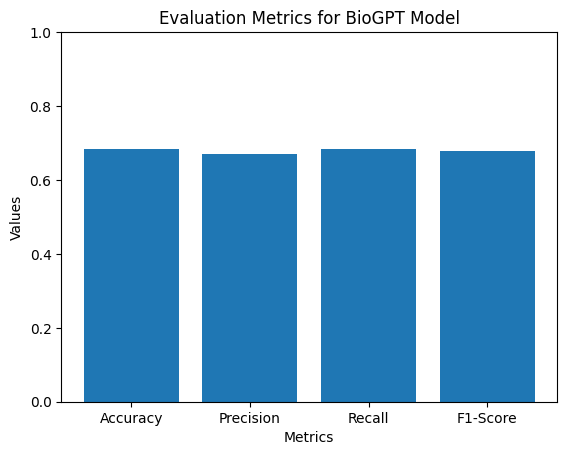

(0.6832134955752213,
 435.0389809389499,
 {'1': {'precision': 0.8335584064821067,
   'recall': 0.8476525620118445,
   'f1-score': 0.8405464062300524,
   'support': 11651.0},
  '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 113.0},
  '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 113.0},
  '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14.0},
  '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0},
  '7': {'precision': 0.008021390374331552,
   'recall': 0.05309734513274336,
   'f1-score': 0.013937282229965157,
   'support': 113.0},
  '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 23.0},
  '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9.0},
  '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 114.0},
  '13': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0},
  '14': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7.0},
  '1

In [1]:
import torch
from transformers import BioGptTokenizer, BioGptForCausalLM, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt
import math
import pandas as pd
from datasets import Dataset

# Define the model and tokenizer path
model_save_path = "/home/muq/project01/biogpt_final"

# Load the tokenizer and model from the saved path
tokenizer = BioGptTokenizer.from_pretrained(model_save_path)
model = BioGptForCausalLM.from_pretrained(model_save_path)

# Prepare test dataset (replace with actual test data)
test_data_path = "/home/muq/project01/updated_test_results.csv"
test_df = pd.read_csv(test_data_path)
test_dataset = Dataset.from_pandas(test_df)

# Tokenization function for test dataset
def tokenize_function(examples):
    inputs = tokenizer(examples['input_text'], padding='max_length', truncation=True, max_length=128)
    if 'desired_output' in examples:
        labels = tokenizer(examples['desired_output'], padding='max_length', truncation=True, max_length=128)
        inputs["labels"] = labels["input_ids"]
    return inputs

# Tokenize the test dataset
tokenized_test_data = test_dataset.map(tokenize_function, batched=True)

# Define a basic Trainer with the loaded model
trainer = Trainer(
    model=model,
    eval_dataset=tokenized_test_data
)

# Evaluate the model and draw the plot
def evaluate_model_and_draw_plot(trainer, test_dataset):
    eval_output = trainer.predict(test_dataset)

    loss = eval_output.metrics.get("test_loss")
    print(f"Test Loss: {loss}")

    perplexity = math.exp(loss) if loss is not None else float('inf')
    
    # Extract logits and labels
    logits = eval_output.predictions[0]  # logits is in the first element of the tuple
    labels = eval_output.label_ids
    
    # Apply argmax to logits to get predicted labels
    preds = logits.argmax(axis=-1)

    accuracy = accuracy_score(labels.flatten(), preds.flatten())
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Perplexity: {perplexity:.4f}")
    
    # Get classification report (precision, recall, F1 score)
    report = classification_report(labels.flatten(), preds.flatten(), output_dict=True)
    print("Classification Report:")
    print(classification_report(labels.flatten(), preds.flatten()))
    
    # Visualize precision, recall, F1 score
    precision, recall, f1_score, _ = precision_recall_fscore_support(labels.flatten(), preds.flatten(), average='weighted')

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    }

    # Plot the evaluation metrics
    plt.bar(metrics.keys(), metrics.values())
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title('Evaluation Metrics for BioGPT Model')
    plt.ylim(0, 1)
    plt.show()

    return accuracy, perplexity, report

# Run the evaluation and draw the plot
evaluate_model_and_draw_plot(trainer, tokenized_test_data)


Map:   0%|          | 0/113 [00:00<?, ? examples/s]

Test Loss: 6.075435638427734
Test Accuracy: 0.6832
Test Perplexity: 435.0390
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.85      0.84     11651
           2       0.00      0.00      0.00       113
           4       0.00      0.00      0.00       113
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         6
           7       0.01      0.05      0.01       113
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00       114
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         7
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00       113
          20       0.00      0.00      0.00         3
          21       0.00      0.00  

/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muq/biogpt-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muq/biogpt-env/lib/py

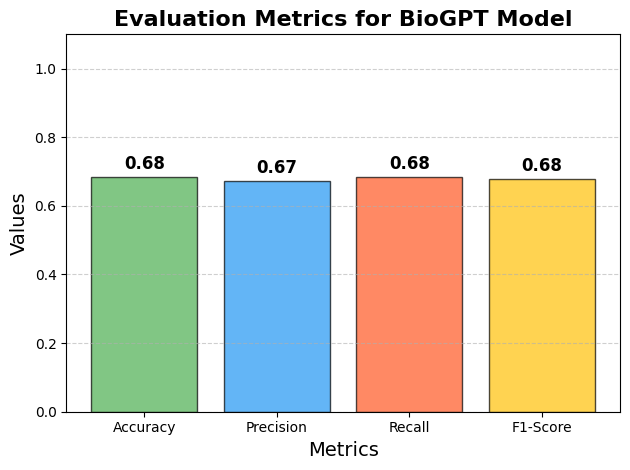

In [2]:
import torch
from transformers import Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt
import math
import pandas as pd
from datasets import Dataset

# Define the model and tokenizer path
model_save_path = "/home/muq/project01/biogpt_final"

# Load the tokenizer and model from the saved path
tokenizer = BioGptTokenizer.from_pretrained(model_save_path)
model = BioGptForCausalLM.from_pretrained(model_save_path)

# Prepare test dataset (replace with actual test data)
test_data_path = "/home/muq/project01/updated_test_results.csv"
test_df = pd.read_csv(test_data_path)
test_dataset = Dataset.from_pandas(test_df)

# Tokenization function for test dataset
def tokenize_function(examples):
    inputs = tokenizer(examples['input_text'], padding='max_length', truncation=True, max_length=128)
    if 'desired_output' in examples:
        labels = tokenizer(examples['desired_output'], padding='max_length', truncation=True, max_length=128)
        inputs["labels"] = labels["input_ids"]
    return inputs

# Tokenize the test dataset
tokenized_test_data = test_dataset.map(tokenize_function, batched=True)

# Define a basic Trainer with the loaded model
trainer = Trainer(
    model=model,
    eval_dataset=tokenized_test_data
)

# Evaluate the model and compute the metrics
def evaluate_model_and_draw_plot(trainer, test_dataset):
    eval_output = trainer.predict(test_dataset)

    loss = eval_output.metrics.get("test_loss")
    print(f"Test Loss: {loss}")

    perplexity = math.exp(loss) if loss is not None else float('inf')
    
    # Extract logits and labels
    logits = eval_output.predictions[0]  # logits is in the first element of the tuple
    labels = eval_output.label_ids
    
    # Apply argmax to logits to get predicted labels
    preds = logits.argmax(axis=-1)

    accuracy = accuracy_score(labels.flatten(), preds.flatten())
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Perplexity: {perplexity:.4f}")
    
    # Get precision, recall, and F1 score
    precision, recall, f1_score, _ = precision_recall_fscore_support(labels.flatten(), preds.flatten(), average='weighted')
    
    # Collect metrics in a dictionary
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    }

    # Print the classification report
    print("Classification Report:")
    print(classification_report(labels.flatten(), preds.flatten()))

    # Plot the metrics dynamically
    plot_metrics(metrics)

# Function to create and display the enhanced bar plot with annotations and unique design
def plot_metrics(metrics):
    # Define the metric names and values
    metric_names = list(metrics.keys())
    metric_values = list(metrics.values())

    # Set the colors for the bars
    colors = ['#4CAF50', '#2196F3', '#FF5722', '#FFC107']  # Green, Blue, Red, Yellow

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create the bar plot
    bars = ax.bar(metric_names, metric_values, color=colors, alpha=0.7, edgecolor='black')

    # Annotate each bar with the metric value
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Format the value to 2 decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position the text at the top of the bar
                    xytext=(0, 3),  # Slightly offset the text
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

    # Add labels and title
    ax.set_xlabel('Metrics', fontsize=14)
    ax.set_ylabel('Values', fontsize=14)
    ax.set_title('Evaluation Metrics for BioGPT Model', fontsize=16, fontweight='bold')

    # Add gridlines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Set y-axis limits to make sure the labels fit
    ax.set_ylim(0, 1.1)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Run the evaluation and draw the plot
evaluate_model_and_draw_plot(trainer, tokenized_test_data)


In [4]:


# Specify the path where you want to save the plot in high resolution
save_path = "/home/muq/project01/evaluation_metrics_plot_high_res.png"

# Call the function to plot and save the metrics in high resolution
plot_metrics(metrics, save_path=save_path, dpi=300)  # dpi=300 for high resolution


NameError: name 'metrics' is not defined